In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. MEMBACA DATA
# Membaca file CSV dengan delimiter semicolon
df = pd.read_csv('dataset.csv', delimiter=';')

In [3]:
# 2. EKSPLORASI AWAL DATA
# Melihat 5 baris pertama data
print("Preview 5 data pertama:")
print(df.head())

# Informasi tentang dataset
print("\nInformasi dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

# Cek missing values
print("\nJumlah missing values:")
print(df.isnull().sum())

Preview 5 data pertama:
    id_tabel             kategori                   uraian       satuan  \
0  B.1.12.01  Moda Perkeretaapian               Kecelakaan     Kejadian   
1  B.1.12.01  Moda Perkeretaapian         Korban Luka-luka        Orang   
2  B.1.12.01  Moda Perkeretaapian         Korban Meninggal        Orang   
3  B.1.12.01  Moda Perkeretaapian     Jumlah Laporan Final      Dokumen   
4  B.1.12.01  Moda Perkeretaapian  Rekomendasi Keselamatan  Rekomendasi   

   tahun  nilai  
0   2018     11  
1   2018      0  
2   2018      0  
3   2018      6  
4   2018     30  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_tabel  100 non-null    object
 1   kategori  100 non-null    object
 2   uraian    100 non-null    object
 3   satuan    100 non-null    object
 4   tahun     100 non-null    int64 
 5   nilai     100 non-null 

In [4]:
# 3. PEMBERSIHAN DATA
# Menghapus duplikat jika ada
df_clean = df.drop_duplicates()
print("\nJumlah baris setelah menghapus duplikat:", len(df_clean))

# Standardisasi nama kolom (lowercase dan hapus spasi)
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')


Jumlah baris setelah menghapus duplikat: 100


In [5]:
# 4. TRANSFORMASI DATA
# Pivot table untuk analisis per moda transportasi
pivot_kejadian = pd.pivot_table(
    df_clean,
    values='nilai',
    index=['tahun'],
    columns=['kategori', 'uraian'],
    aggfunc='sum'
)

# Reset index untuk memudahkan plotting

In [6]:
# 5. ANALISIS DASAR
# Menghitung total kejadian per tahun
total_kejadian = df_clean[df_clean['uraian'] == 'Kecelakaan'].groupby('tahun')['nilai'].sum()
print("\nTotal kejadian per tahun:")
print(total_kejadian)

# Menghitung total korban meninggal per tahun
total_meninggal = df_clean[df_clean['uraian'] == 'Korban Meninggal'].groupby('tahun')['nilai'].sum()
print("\nTotal korban meninggal per tahun:")
print(total_meninggal)


Total kejadian per tahun:
tahun
2018    111
2019     82
2020     50
2021     62
2022     52
Name: nilai, dtype: int64

Total korban meninggal per tahun:
tahun
2018    601
2019    213
2020     60
2021    233
2022    148
Name: nilai, dtype: int64


In [7]:
# 6. MENYIMPAN HASIL PREPROCESSING
# Menyimpan data yang sudah bersih
df_clean.to_csv('clean_data_knkt.csv', index=False)
print("\nData bersih telah disimpan ke 'clean_data_knkt.csv'")

# Menyimpan hasil pivot
pivot_kejadian.to_csv('pivot_kejadian_knkt.csv', index=False)
print("Data pivot telah disimpan ke 'pivot_kejadian_knkt.csv'")


Data bersih telah disimpan ke 'clean_data_knkt.csv'
Data pivot telah disimpan ke 'pivot_kejadian_knkt.csv'


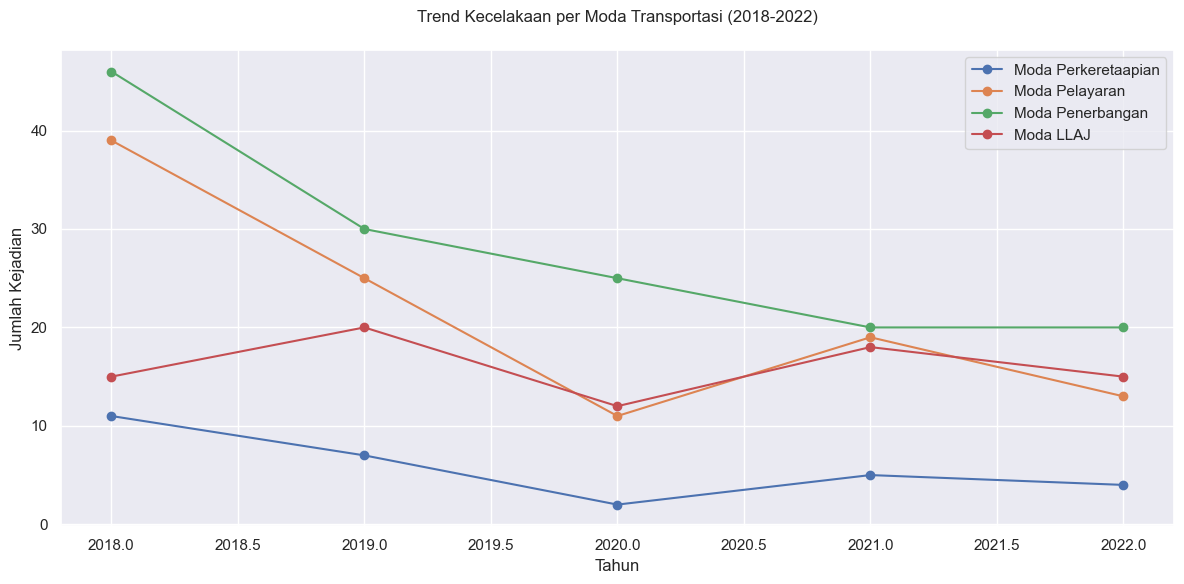

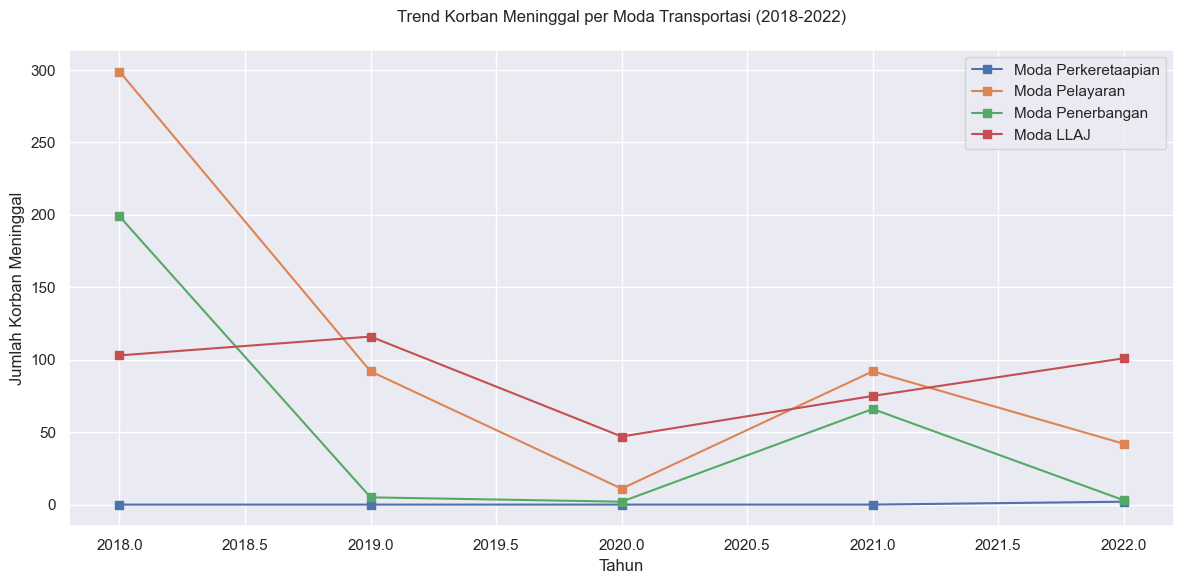

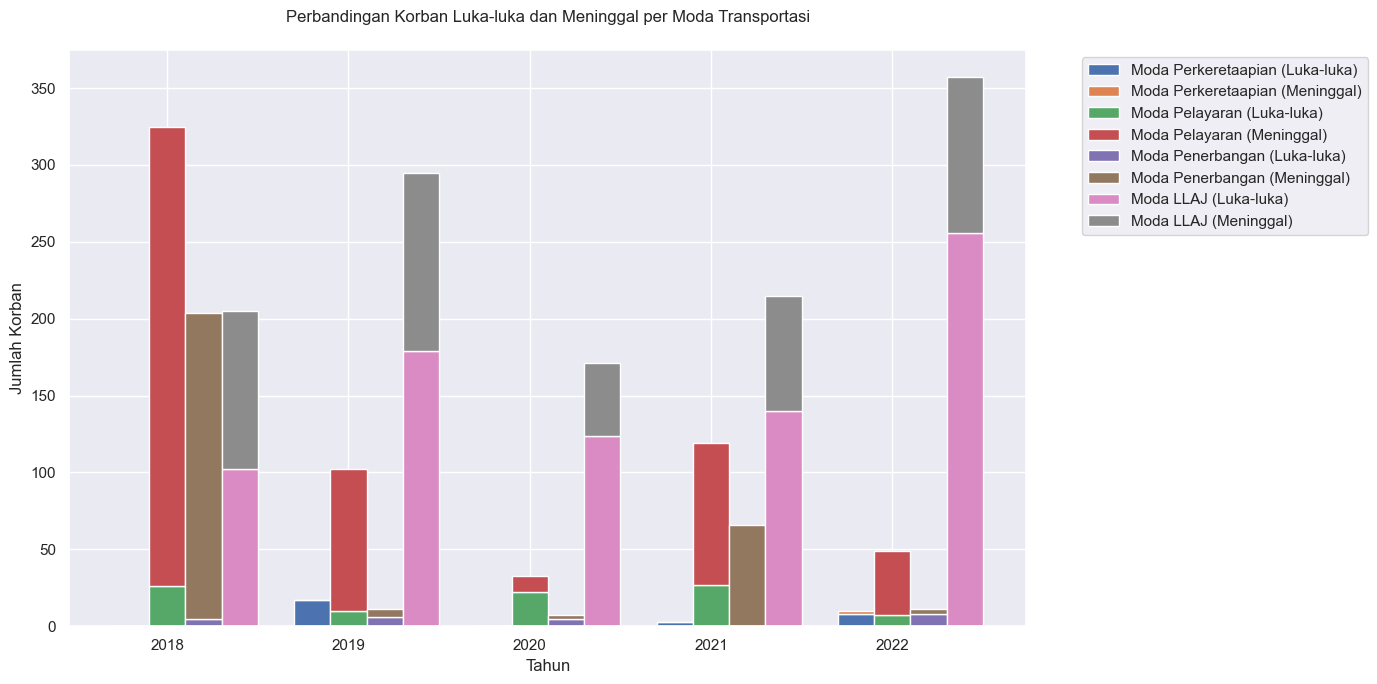

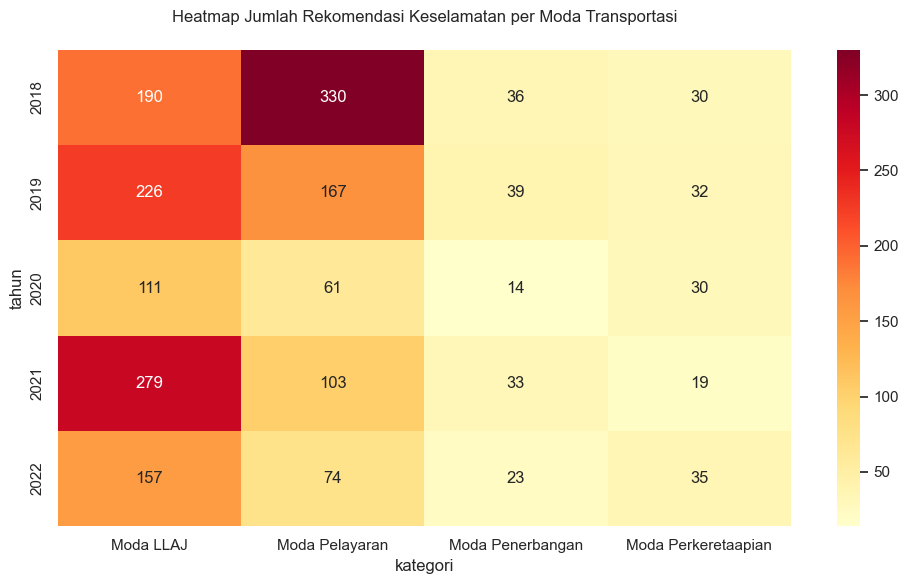

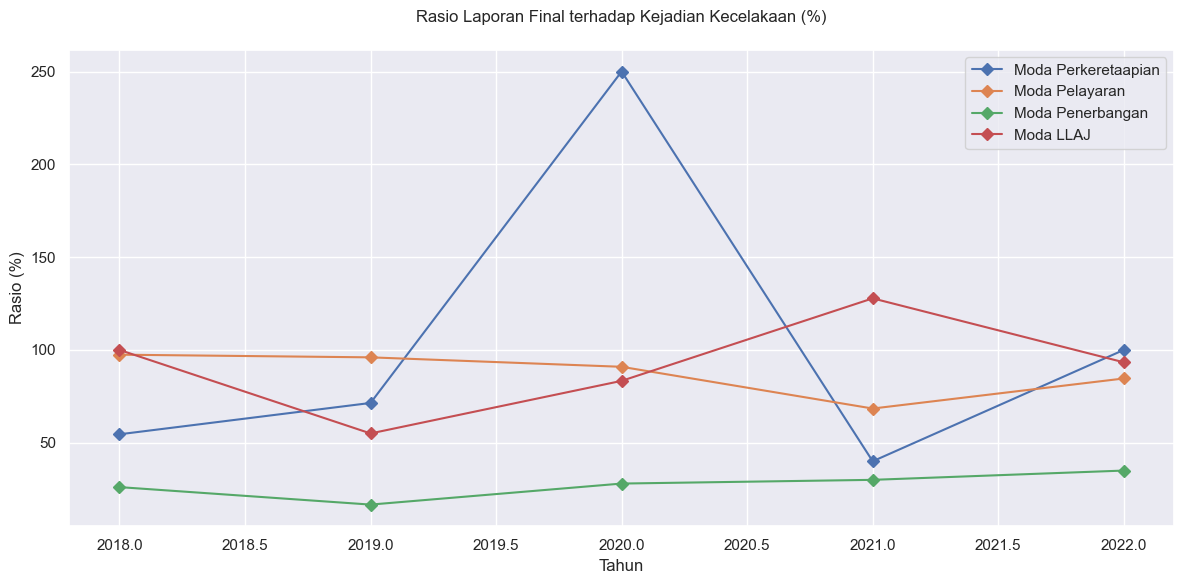

In [13]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk visualisasi
plt.style.use('default')
sns.set_theme()

# 1. Visualisasi Trend Kecelakaan per Moda
plt.figure(figsize=(12, 6))
for kategori in df_clean['kategori'].unique():
    data = df_clean[
        (df_clean['kategori'] == kategori) & 
        (df_clean['uraian'] == 'Kecelakaan')
    ]
    plt.plot(data['tahun'], data['nilai'], marker='o', label=kategori)

plt.title('Trend Kecelakaan per Moda Transportasi (2018-2022)', pad=20)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Visualisasi Korban Meninggal per Moda
plt.figure(figsize=(12, 6))
for kategori in df_clean['kategori'].unique():
    data = df_clean[
        (df_clean['kategori'] == kategori) & 
        (df_clean['uraian'] == 'Korban Meninggal')
    ]
    plt.plot(data['tahun'], data['nilai'], marker='s', label=kategori)

plt.title('Trend Korban Meninggal per Moda Transportasi (2018-2022)', pad=20)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Korban Meninggal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Visualisasi Perbandingan Korban (Stacked Bar)
plt.figure(figsize=(14, 7))
df_korban = df_clean[df_clean['uraian'].isin(['Korban Luka-luka', 'Korban Meninggal'])]
pivot_korban = pd.pivot_table(
    df_korban,
    values='nilai',
    index=['tahun', 'kategori'],
    columns='uraian',
    aggfunc='sum'
).reset_index()

categories = df_clean['kategori'].unique()
x = np.arange(len(df_clean['tahun'].unique()))
width = 0.2
multiplier = 0

for category in categories:
    data = pivot_korban[pivot_korban['kategori'] == category]
    offset = width * multiplier
    plt.bar(x + offset, data['Korban Luka-luka'], width, label=f'{category} (Luka-luka)')
    plt.bar(x + offset, data['Korban Meninggal'], width, 
            bottom=data['Korban Luka-luka'],
            label=f'{category} (Meninggal)')
    multiplier += 1

plt.xlabel('Tahun')
plt.ylabel('Jumlah Korban')
plt.title('Perbandingan Korban Luka-luka dan Meninggal per Moda Transportasi', pad=20)
plt.xticks(x + width, df_clean['tahun'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Visualisasi Heatmap Rekomendasi Keselamatan
plt.figure(figsize=(10, 6))
df_rekomendasi = df_clean[df_clean['uraian'] == 'Rekomendasi Keselamatan']
pivot_rekomendasi = pd.pivot_table(
    df_rekomendasi,
    values='nilai',
    index='tahun',
    columns='kategori',
    aggfunc='sum'
)

sns.heatmap(pivot_rekomendasi, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Heatmap Jumlah Rekomendasi Keselamatan per Moda Transportasi', pad=20)
plt.tight_layout()
plt.show()

# 5. Visualisasi Rasio Kejadian vs Laporan Final
plt.figure(figsize=(12, 6))
df_rasio = df_clean[df_clean['uraian'].isin(['Kecelakaan', 'Jumlah Laporan Final'])]
pivot_rasio = pd.pivot_table(
    df_rasio,
    values='nilai',
    index=['tahun', 'kategori'],
    columns='uraian',
    aggfunc='sum'
).reset_index()

pivot_rasio['rasio_laporan'] = (pivot_rasio['Jumlah Laporan Final'] / 
                               pivot_rasio['Kecelakaan'] * 100)

for kategori in df_clean['kategori'].unique():
    data = pivot_rasio[pivot_rasio['kategori'] == kategori]
    plt.plot(data['tahun'], data['rasio_laporan'], 
            marker='D', label=kategori)

plt.title('Rasio Laporan Final terhadap Kejadian Kecelakaan (%)', pad=20)
plt.xlabel('Tahun')
plt.ylabel('Rasio (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


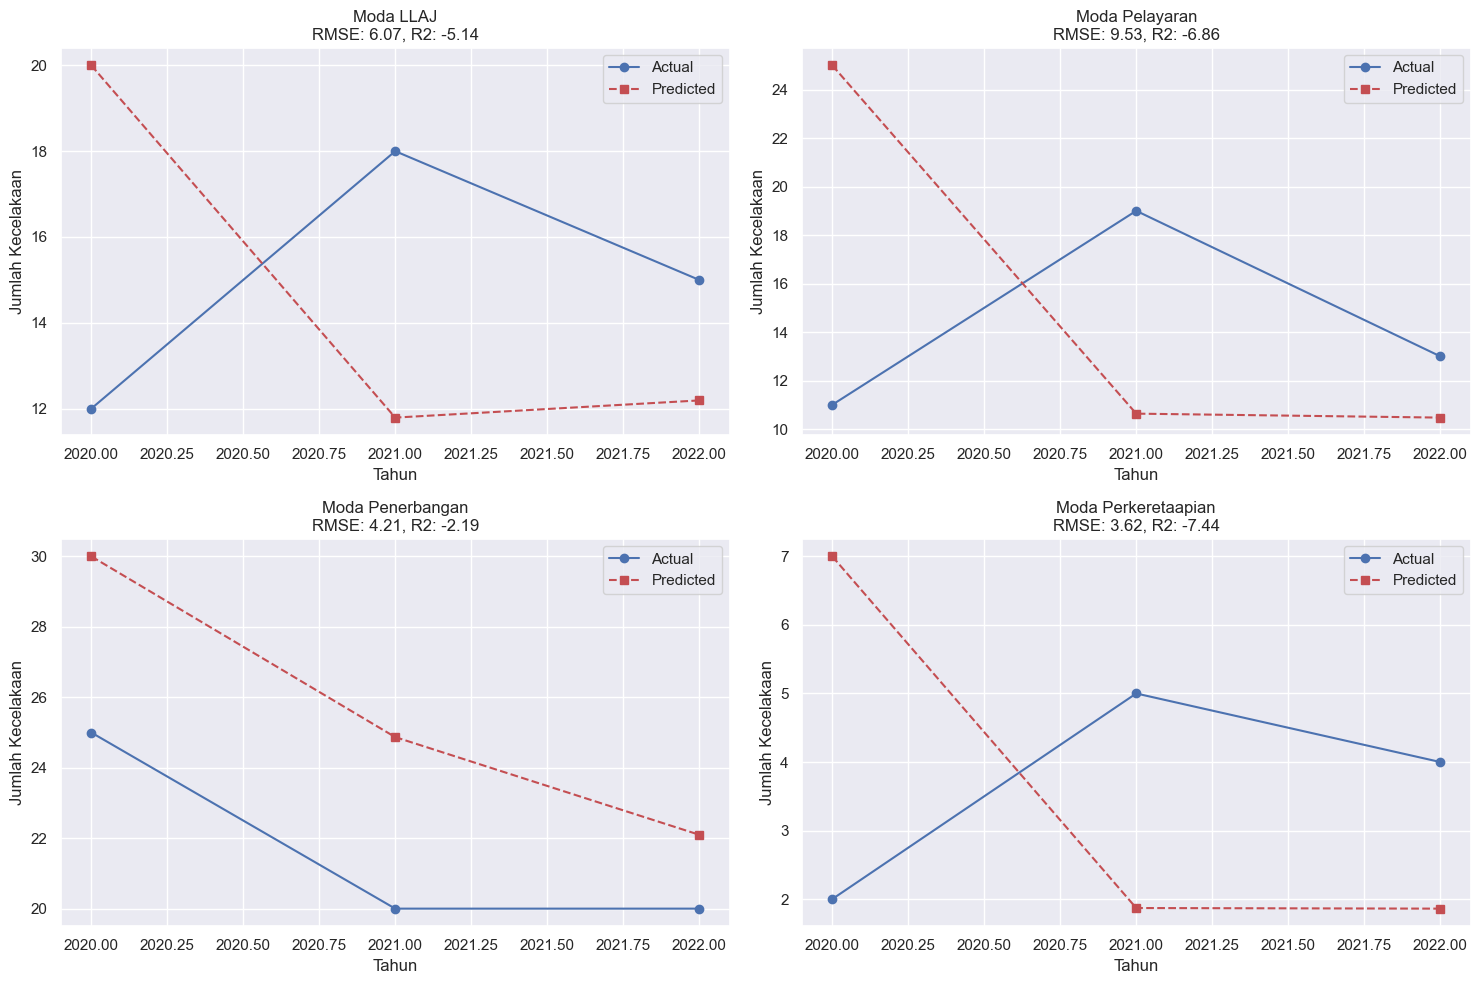


Metrics untuk setiap moda transportasi:

Moda LLAJ:
RMSE: 6.0673
MAE: 5.6725
R2: -5.1354

Moda Pelayaran:
RMSE: 9.5284
MAE: 8.2980
R2: -6.8569

Moda Penerbangan:
RMSE: 4.2076
MAE: 3.9891
R2: -2.1868

Moda Perkeretaapian:
RMSE: 3.6229
MAE: 3.4233
R2: -7.4380

Prediksi jumlah kecelakaan untuk tahun 2023:
Moda LLAJ: 12.19 kejadian
Moda Pelayaran: 10.47 kejadian
Moda Penerbangan: 22.10 kejadian
Moda Perkeretaapian: 1.86 kejadian


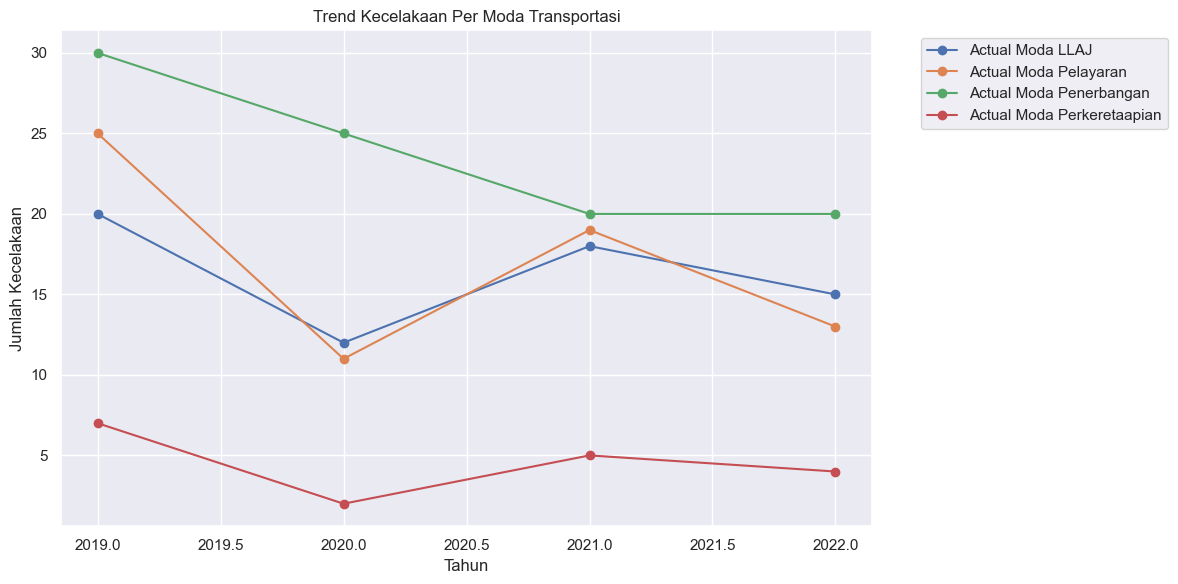

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')

# Filter data kecelakaan
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()

# Pivot data
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Feature Engineering
# Membuat lag features untuk setiap moda transportasi
for col in pivot_df.columns[1:]:
    pivot_df[f'{col}_lag1'] = pivot_df[col].shift(1)

# Hapus baris dengan NaN
pivot_df = pivot_df.dropna()

# 3. Prepare Data
features = [col for col in pivot_df.columns if 'lag1' in col]
targets = ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']

X = pivot_df[features]
y = pivot_df[targets]

# Standardisasi untuk setiap target secara terpisah
scalers_X = StandardScaler()
scalers_y = {target: StandardScaler() for target in targets}

X_scaled = scalers_X.fit_transform(X)
y_scaled = {target: scalers_y[target].fit_transform(y[target].values.reshape(-1, 1)) 
            for target in targets}

# 4. Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=3)
models = {}
predictions = {}
metrics = {}

# Training dan evaluasi untuk setiap moda transportasi
for target in targets:
    models[target] = LinearRegression()
    y_target = y_scaled[target]
    
    all_predictions = []
    all_actual = []
    
    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_target[train_idx], y_target[test_idx]
        
        # Fit model
        models[target].fit(X_train, y_train)
        
        # Predict
        y_pred = models[target].predict(X_test)
        
        # Store predictions dan actual values
        all_predictions.extend(y_pred)
        all_actual.extend(y_test)
    
    # Inverse transform menggunakan scaler yang sesuai
    predictions[target] = scalers_y[target].inverse_transform(
        np.array(all_predictions).reshape(-1, 1))
    actual_values = scalers_y[target].inverse_transform(
        np.array(all_actual).reshape(-1, 1))
    
    # Calculate metrics
    metrics[target] = {
        'RMSE': np.sqrt(mean_squared_error(actual_values, predictions[target])),
        'MAE': mean_absolute_error(actual_values, predictions[target]),
        'R2': r2_score(actual_values, predictions[target])
    }

# 5. Visualisasi
plt.figure(figsize=(15, 10))

for idx, target in enumerate(targets):
    plt.subplot(2, 2, idx+1)
    years = pivot_df['tahun'].values[1:]  # Skip first year due to lag
    actual = pivot_df[target].values[1:]
    pred = predictions[target].flatten()
    
    plt.plot(years, actual, 'b-', label='Actual', marker='o')
    plt.plot(years, pred, 'r--', label='Predicted', marker='s')
    plt.title(f'{target}\nRMSE: {metrics[target]["RMSE"]:.2f}, R2: {metrics[target]["R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for target in targets:
    print(f"\n{target}:")
    for metric, value in metrics[target].items():
        print(f"{metric}: {value:.4f}")

# 7. Prediksi 2023
future_predictions = {}
last_data = X_scaled[-1].reshape(1, -1)

for target in targets:
    pred = models[target].predict(last_data)
    pred_transformed = scalers_y[target].inverse_transform(pred.reshape(-1, 1))
    future_predictions[target] = pred_transformed[0][0]

print("\nPrediksi jumlah kecelakaan untuk tahun 2023:")
for target, pred in future_predictions.items():
    print(f"{target}: {pred:.2f} kejadian")

# 8. Tambahan: Plot trend prediksi
plt.figure(figsize=(12, 6))
for target in targets:
    plt.plot(pivot_df['tahun'], pivot_df[target], marker='o', label=f'Actual {target}')
plt.title('Trend Kecelakaan Per Moda Transportasi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

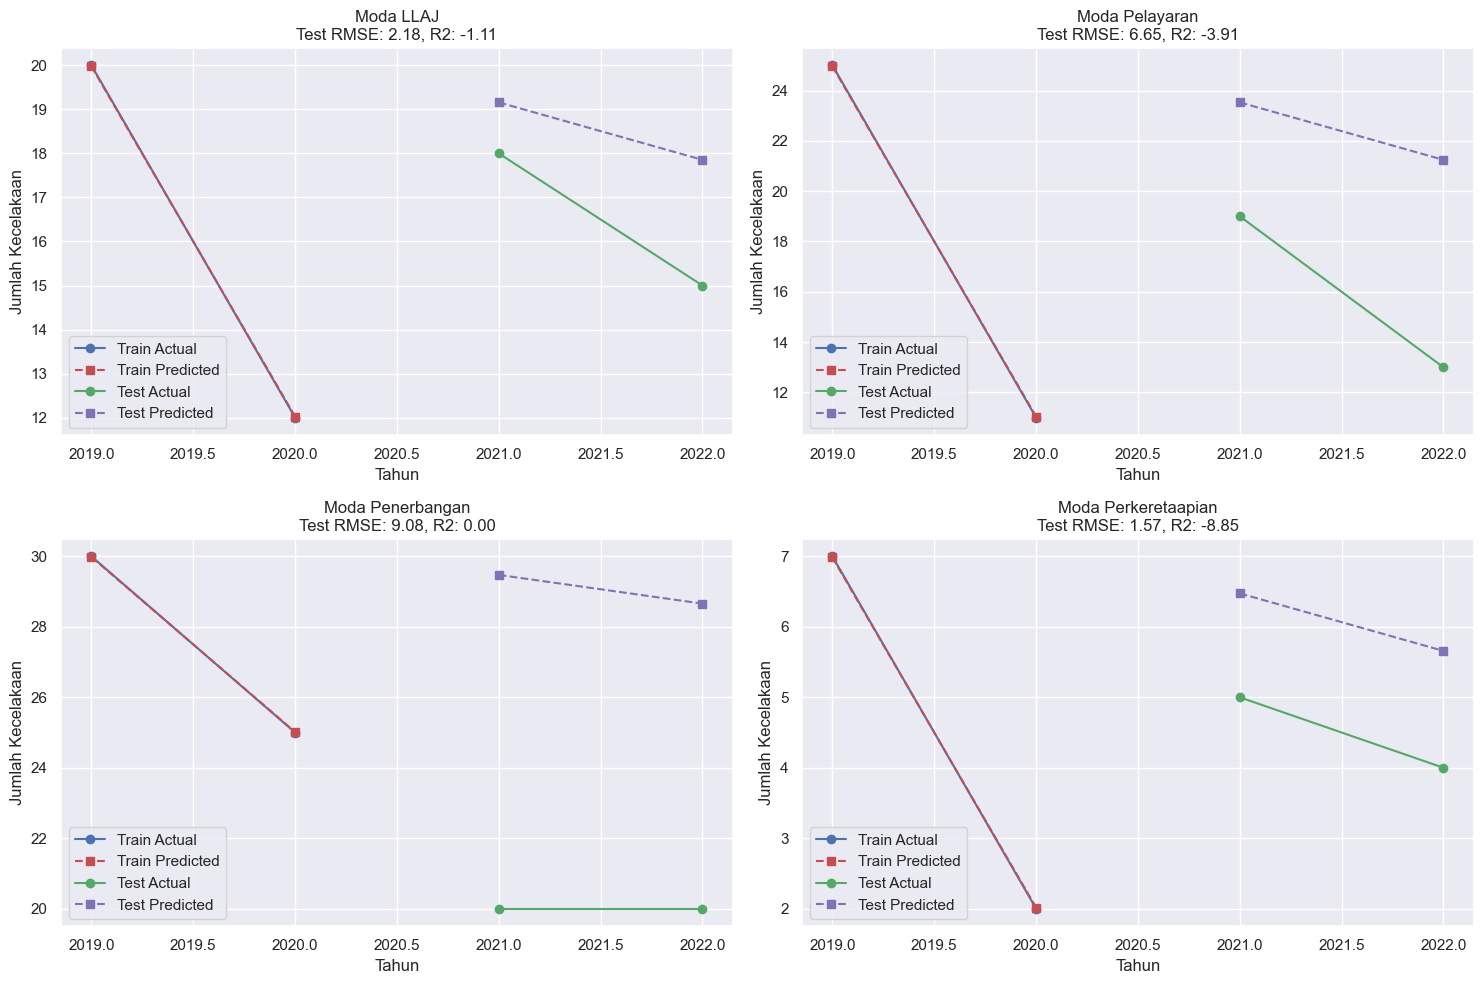


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 0.0237
Train R2: 1.0000
Train MAE: 0.0237
Test RMSE: 2.1779
Test R2: -1.1081
Test MAE: 2.0064

Moda Pelayaran:
Train RMSE: 0.0414
Train R2: 1.0000
Train MAE: 0.0414
Test RMSE: 6.6508
Test R2: -3.9148
Test MAE: 6.3862

Moda Penerbangan:
Train RMSE: 0.0148
Train R2: 1.0000
Train MAE: 0.0148
Test RMSE: 9.0757
Test R2: 0.0000
Test MAE: 9.0665

Moda Perkeretaapian:
Train RMSE: 0.0148
Train R2: 1.0000
Train MAE: 0.0148
Test RMSE: 1.5692
Test R2: -8.8493
Test MAE: 1.5665

Top 5 Feature Importance untuk Moda LLAJ:
                     feature  importance
2        Moda Pelayaran_lag1    0.528483
1       Moda LLAJ_yoy_change    0.249752
0             Moda LLAJ_lag1    0.221765
3  Moda Pelayaran_yoy_change    0.000000
4      Moda Penerbangan_lag1    0.000000

Top 5 Feature Importance untuk Moda Pelayaran:
                     feature  importance
2        Moda Pelayaran_lag1    0.528483
1       Moda LLAJ_yoy_change    0.249752
0     

In [19]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Feature Engineering
def create_features(df):
    df = df.copy()
    for col in df.columns[1:]:
        # Lag features
        df[f'{col}_lag1'] = df[col].shift(1)
        # Perubahan YoY
        df[f'{col}_yoy_change'] = df[col].pct_change() * 100
        
    return df

pivot_df = create_features(pivot_df)
pivot_df = pivot_df.dropna()

# 3. Prepare Data
features = [col for col in pivot_df.columns if ('lag1' in col or 'yoy_change' in col)]
targets = ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']

X = pivot_df[features]
y = pivot_df[targets]

# 4. Train Test Split
train_size = int(len(X) * 0.7)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# 5. Scaling
scaler_X = StandardScaler()
scalers_y = {target: StandardScaler() for target in targets}

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale each target separately
y_train_scaled = {}
y_test_scaled = {}
for target in targets:
    y_train_scaled[target] = scalers_y[target].fit_transform(y_train[target].values.reshape(-1, 1))
    y_test_scaled[target] = scalers_y[target].transform(y_test[target].values.reshape(-1, 1))

# 6. Model Training
models = {}
predictions = {}
metrics = {}

for target in targets:
    # Initialize XGBoost
    models[target] = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
    
    # Train model
    models[target].fit(
        X_train_scaled, 
        y_train_scaled[target].ravel(),
        eval_set=[(X_test_scaled, y_test_scaled[target].ravel())],
        verbose=False
    )
    
    # Make predictions
    train_pred = models[target].predict(X_train_scaled).reshape(-1, 1)
    test_pred = models[target].predict(X_test_scaled).reshape(-1, 1)
    
    # Inverse transform predictions using the correct scaler
    train_pred = scalers_y[target].inverse_transform(train_pred).ravel()
    test_pred = scalers_y[target].inverse_transform(test_pred).ravel()
    
    predictions[target] = {
        'train': train_pred,
        'test': test_pred
    }
    
    # Calculate metrics
    metrics[target] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train[target], train_pred)),
        'Train R2': r2_score(y_train[target], train_pred),
        'Train MAE': mean_absolute_error(y_train[target], train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test[target], test_pred)),
        'Test R2': r2_score(y_test[target], test_pred),
        'Test MAE': mean_absolute_error(y_test[target], test_pred)
    }

# 7. Visualisasi
plt.figure(figsize=(15, 10))

for idx, target in enumerate(targets):
    plt.subplot(2, 2, idx+1)
    
    # Plot training data
    plt.plot(pivot_df['tahun'][:train_size], y_train[target], 
             'b-', label='Train Actual', marker='o')
    plt.plot(pivot_df['tahun'][:train_size], predictions[target]['train'], 
             'r--', label='Train Predicted', marker='s')
    
    # Plot test data
    plt.plot(pivot_df['tahun'][train_size:], y_test[target], 
             'g-', label='Test Actual', marker='o')
    plt.plot(pivot_df['tahun'][train_size:], predictions[target]['test'], 
             'm--', label='Test Predicted', marker='s')
    
    plt.title(f'{target}\nTest RMSE: {metrics[target]["Test RMSE"]:.2f}, R2: {metrics[target]["Test R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 8. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for target in metrics:
    print(f"\n{target}:")
    for metric, value in metrics[target].items():
        print(f"{metric}: {value:.4f}")

# 9. Feature Importance
for target in targets:
    importance = pd.DataFrame({
        'feature': features,
        'importance': models[target].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 5 Feature Importance untuk {target}:")
    print(importance.head())

# 10. Prediksi 2023
last_data = scaler_X.transform(X.iloc[[-1]])
future_predictions = {}

for target in targets:
    pred = models[target].predict(last_data)
    pred_transformed = scalers_y[target].inverse_transform(pred.reshape(-1, 1))[0][0]
    future_predictions[target] = pred_transformed

print("\nPrediksi jumlah kecelakaan untuk tahun 2023:")
for target, pred in future_predictions.items():
    print(f"{target}: {pred:.2f} kejadian")

14:08:32 - cmdstanpy - INFO - Chain [1] start processing
14:08:35 - cmdstanpy - INFO - Chain [1] done processing
14:08:35 - cmdstanpy - INFO - Chain [1] start processing
14:08:42 - cmdstanpy - INFO - Chain [1] done processing
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
14:08:42 - cmdstanpy - INFO - Chain [1] done processing
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
14:08:48 - cmdstanpy - INFO - Chain [1] done processing


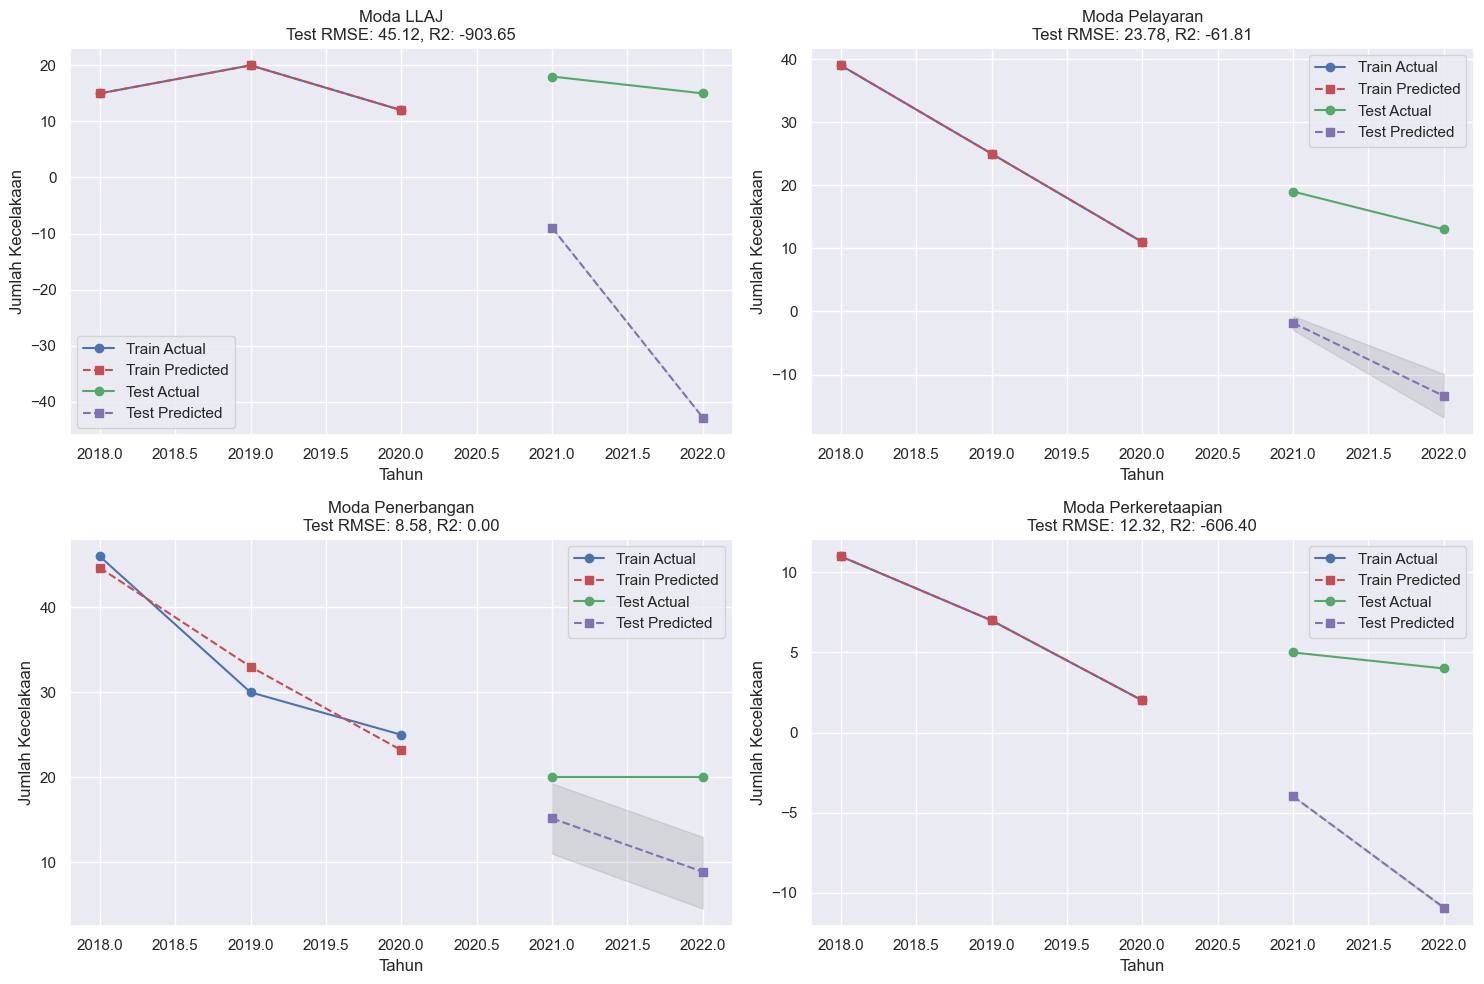


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 0.0000
Train R2: 1.0000
Train MAE: 0.0000
Test RMSE: 45.1160
Test R2: -903.6459
Test MAE: 42.3952

Moda Pelayaran:
Train RMSE: 0.0001
Train R2: 1.0000
Train MAE: 0.0001
Test RMSE: 23.7762
Test R2: -61.8121
Test MAE: 23.6112

Moda Penerbangan:
Train RMSE: 2.1707
Train R2: 0.9413
Train MAE: 2.0542
Test RMSE: 8.5832
Test R2: 0.0000
Test MAE: 7.9867

Moda Perkeretaapian:
Train RMSE: 0.0000
Train R2: 1.0000
Train MAE: 0.0000
Test RMSE: 12.3228
Test R2: -606.4020
Test MAE: 11.9579

Prediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):
Moda LLAJ: -8.96 (-8.96 - -8.96)
Moda Pelayaran: -1.81 (-2.84 - -0.62)
Moda Penerbangan: 15.16 (11.17 - 19.33)
Moda Perkeretaapian: -3.98 (-4.00 - -3.96)


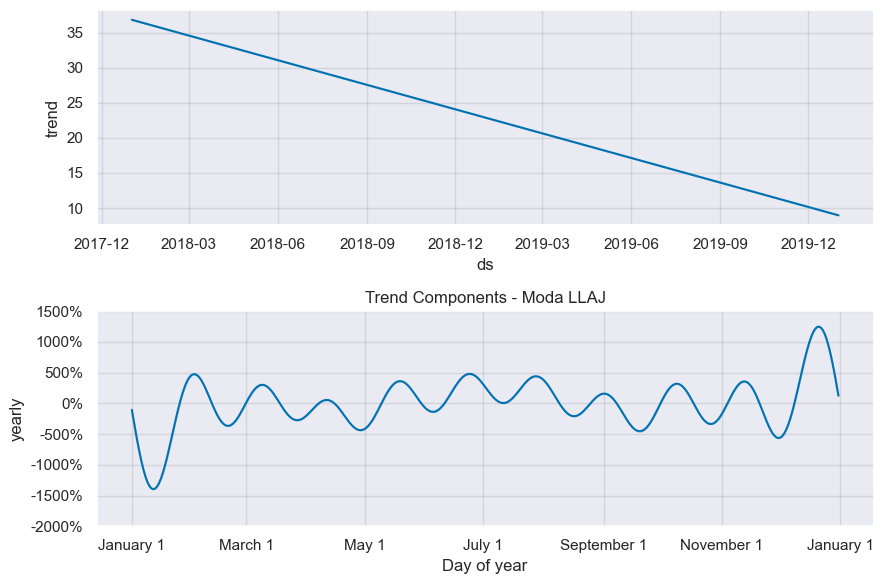

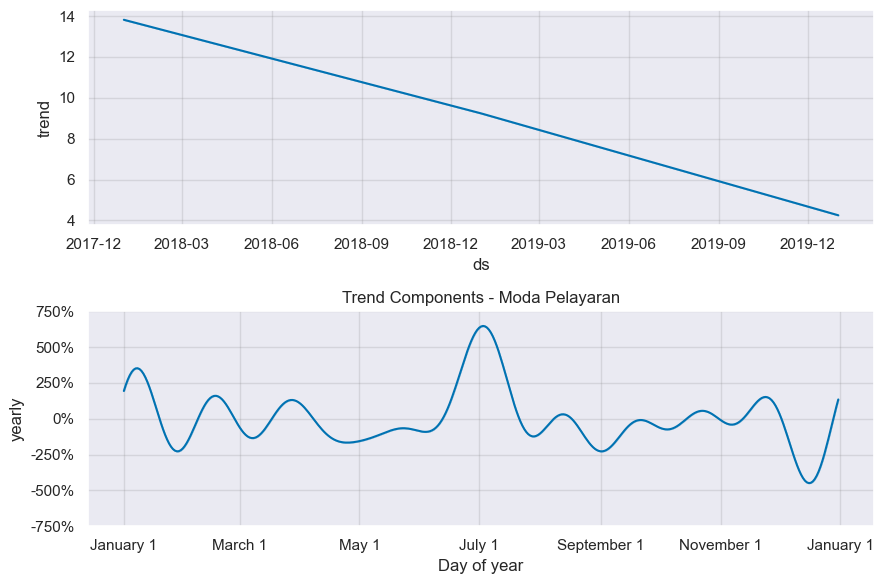

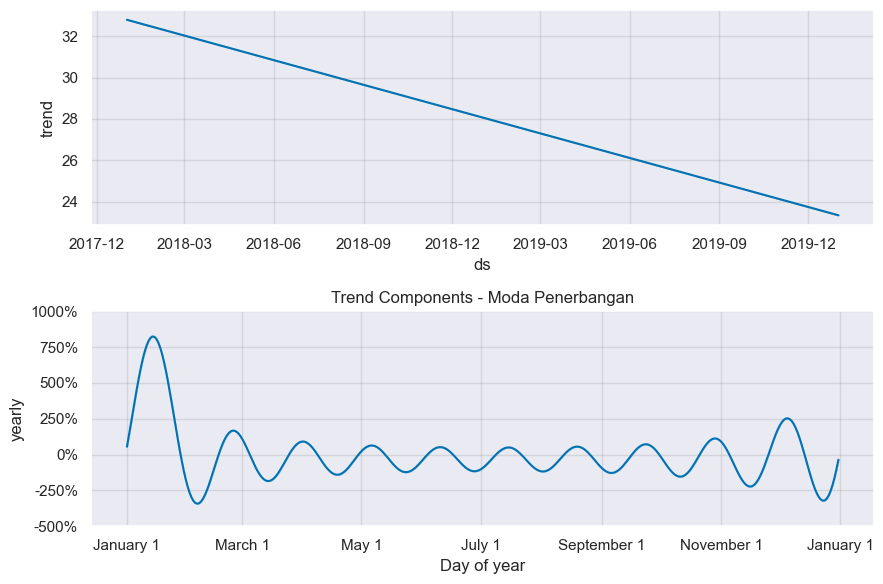

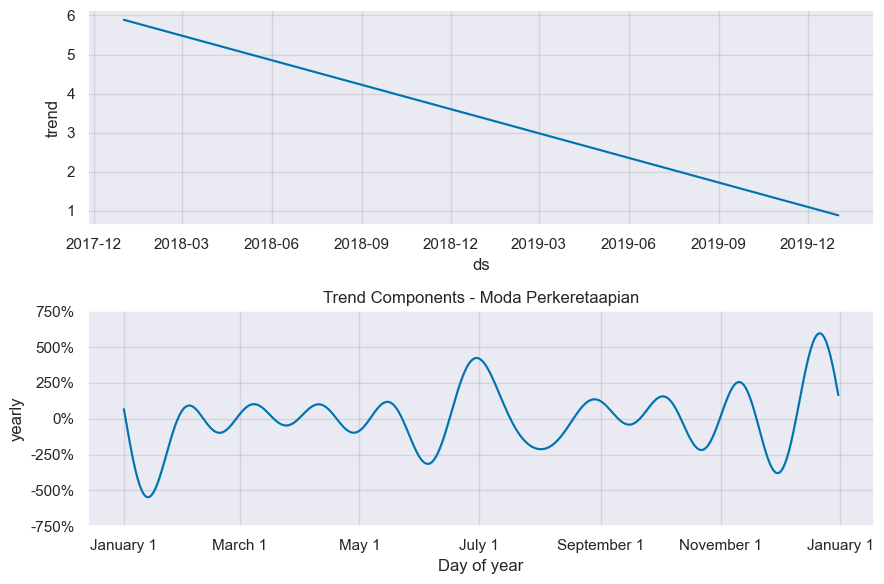

In [21]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Function untuk fit Prophet dan evaluasi
def fit_prophet(data, column_name, train_size):
    # Prepare data untuk Prophet (membutuhkan kolom 'ds' dan 'y')
    prophet_df = pd.DataFrame({
        'ds': pd.to_datetime(data['tahun'].astype(str)),
        'y': data[column_name]
    })
    
    # Split data
    train = prophet_df.iloc[:train_size]
    test = prophet_df.iloc[train_size:]
    
    # Initialize dan fit model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        interval_width=0.95,
        seasonality_mode='multiplicative'
    )
    model.fit(train)
    
    # Make predictions
    train_dates = model.make_future_dataframe(periods=0, freq='Y')
    train_dates = train_dates[train_dates['ds'].isin(train['ds'])]
    train_pred = model.predict(train_dates)
    
    test_dates = model.make_future_dataframe(periods=len(test), freq='Y')
    test_pred = model.predict(test_dates)
    test_pred = test_pred.iloc[-len(test):]
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(train['y'], train_pred['yhat'])),
        'Train R2': r2_score(train['y'], train_pred['yhat']),
        'Train MAE': mean_absolute_error(train['y'], train_pred['yhat']),
        'Test RMSE': np.sqrt(mean_squared_error(test['y'], test_pred['yhat'])),
        'Test R2': r2_score(test['y'], test_pred['yhat']),
        'Test MAE': mean_absolute_error(test['y'], test_pred['yhat'])
    }
    
    return train_pred, test_pred, metrics, model

# 3. Train models
train_size = int(len(pivot_df) * 0.7)
models = {}
predictions = {}
metrics = {}

for column in pivot_df.columns[1:]:  # Skip 'tahun' column
    train_pred, test_pred, metric, model = fit_prophet(pivot_df, column, train_size)
    
    predictions[column] = {
        'train': train_pred,
        'test': test_pred
    }
    metrics[column] = metric
    models[column] = model

# 4. Visualisasi
plt.figure(figsize=(15, 10))

for idx, column in enumerate(pivot_df.columns[1:]):
    plt.subplot(2, 2, idx+1)
    
    # Plot training data
    train_dates = pivot_df['tahun'][:train_size]
    test_dates = pivot_df['tahun'][train_size:]
    
    plt.plot(train_dates, pivot_df[column][:train_size], 
             'b-', label='Train Actual', marker='o')
    plt.plot(train_dates, predictions[column]['train']['yhat'], 
             'r--', label='Train Predicted', marker='s')
    
    # Plot test data with confidence intervals
    plt.plot(test_dates, pivot_df[column][train_size:], 
             'g-', label='Test Actual', marker='o')
    plt.plot(test_dates, predictions[column]['test']['yhat'], 
             'm--', label='Test Predicted', marker='s')
    
    plt.fill_between(test_dates,
                    predictions[column]['test']['yhat_lower'],
                    predictions[column]['test']['yhat_upper'],
                    color='gray', alpha=0.2)
    
    plt.title(f'{column}\nTest RMSE: {metrics[column]["Test RMSE"]:.2f}, R2: {metrics[column]["Test R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for column in pivot_df.columns[1:]:
    print(f"\n{column}:")
    for metric, value in metrics[column].items():
        print(f"{metric}: {value:.4f}")

# 6. Prediksi 2023
future_predictions = {}
prediction_intervals = {}

for column in pivot_df.columns[1:]:
    future = models[column].make_future_dataframe(periods=1, freq='Y')
    forecast = models[column].predict(future)
    last_prediction = forecast.iloc[-1]
    
    future_predictions[column] = last_prediction['yhat']
    prediction_intervals[column] = (last_prediction['yhat_lower'], 
                                  last_prediction['yhat_upper'])

print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):")
for column in pivot_df.columns[1:]:
    print(f"{column}: {future_predictions[column]:.2f} "
          f"({prediction_intervals[column][0]:.2f} - {prediction_intervals[column][1]:.2f})")

# 7. Plot Trend Components
for column in pivot_df.columns[1:]:
    fig = models[column].plot_components(predictions[column]['train'])
    plt.title(f"Trend Components - {column}")
    plt.tight_layout()
    plt.show()

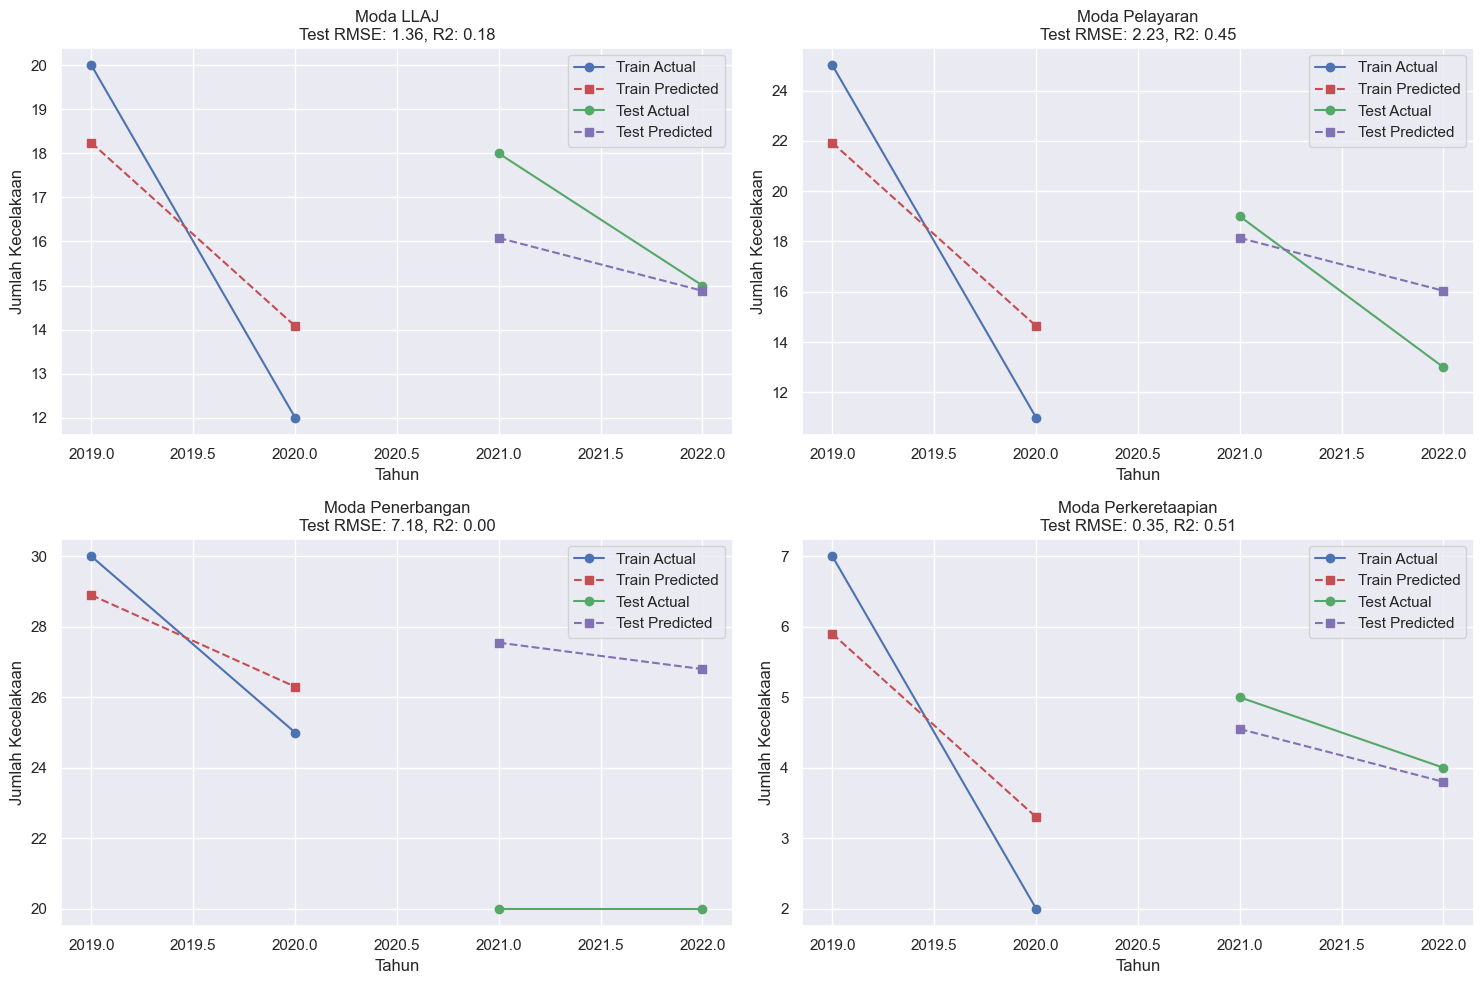


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 1.9267
Train R2: 0.7680
Test RMSE: 1.3603
Test R2: 0.1776

Moda Pelayaran:
Train RMSE: 3.3716
Train R2: 0.7680
Test RMSE: 2.2340
Test R2: 0.4455

Moda Penerbangan:
Train RMSE: 1.2042
Train R2: 0.7680
Test RMSE: 7.1848
Test R2: 0.0000

Moda Perkeretaapian:
Train RMSE: 1.2042
Train R2: 0.7680
Test RMSE: 0.3482
Test R2: 0.5150

Top 5 Feature Importance:
                       feature  importance
2          Moda Pelayaran_lag1    0.192308
1         Moda LLAJ_pct_change    0.153846
5  Moda Penerbangan_pct_change    0.153846
0               Moda LLAJ_lag1    0.134615
4        Moda Penerbangan_lag1    0.115385

Prediksi jumlah kecelakaan untuk tahun 2023:
Moda LLAJ: 14.88 kejadian
Moda Pelayaran: 16.04 kejadian
Moda Penerbangan: 26.80 kejadian
Moda Perkeretaapian: 3.80 kejadian


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Feature Engineering
def create_features(df):
    df = df.copy()
    # Lag features
    for col in df.columns[1:]:
        df[f'{col}_lag1'] = df[col].shift(1)
        # Perubahan persentase
        df[f'{col}_pct_change'] = df[col].pct_change() * 100
    return df

pivot_df = create_features(pivot_df)
pivot_df = pivot_df.dropna()

# 3. Prepare Data
features = [col for col in pivot_df.columns if ('lag1' in col or 'pct_change' in col)]
targets = ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']

X = pivot_df[features]
y = pivot_df[targets]

# 4. Train Test Split (menggunakan split temporal)
train_size = int(len(X) * 0.7)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# 5. Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# 6. Model Training
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train_scaled, y_train_scaled)

# 7. Predictions
train_predictions = scaler_y.inverse_transform(model.predict(X_train_scaled))
test_predictions = scaler_y.inverse_transform(model.predict(X_test_scaled))

# 8. Calculate Metrics
metrics = {}
for i, target in enumerate(targets):
    train_rmse = np.sqrt(mean_squared_error(y_train[target], train_predictions[:, i]))
    train_r2 = r2_score(y_train[target], train_predictions[:, i])
    test_rmse = np.sqrt(mean_squared_error(y_test[target], test_predictions[:, i]))
    test_r2 = r2_score(y_test[target], test_predictions[:, i])
    
    metrics[target] = {
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

# 9. Visualisasi
plt.figure(figsize=(15, 10))

for idx, target in enumerate(targets):
    plt.subplot(2, 2, idx+1)
    
    # Plot training data
    plt.plot(pivot_df['tahun'][:train_size], y_train[target], 
             'b-', label='Train Actual', marker='o')
    plt.plot(pivot_df['tahun'][:train_size], train_predictions[:, idx], 
             'r--', label='Train Predicted', marker='s')
    
    # Plot test data
    plt.plot(pivot_df['tahun'][train_size:], y_test[target], 
             'g-', label='Test Actual', marker='o')
    plt.plot(pivot_df['tahun'][train_size:], test_predictions[:, idx], 
             'm--', label='Test Predicted', marker='s')
    
    plt.title(f'{target}\nTest RMSE: {metrics[target]["Test RMSE"]:.2f}, R2: {metrics[target]["Test R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 10. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for target in metrics:
    print(f"\n{target}:")
    for metric, value in metrics[target].items():
        print(f"{metric}: {value:.4f}")

# 11. Feature Importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Feature Importance:")
print(importance.head())

# 12. Prediksi 2023
last_data = scaler_X.transform(X.iloc[[-1]])
future_pred = scaler_y.inverse_transform(model.predict(last_data))[0]

print("\nPrediksi jumlah kecelakaan untuk tahun 2023:")
for i, target in enumerate(targets):
    print(f"{target}: {future_pred[i]:.2f} kejadian")

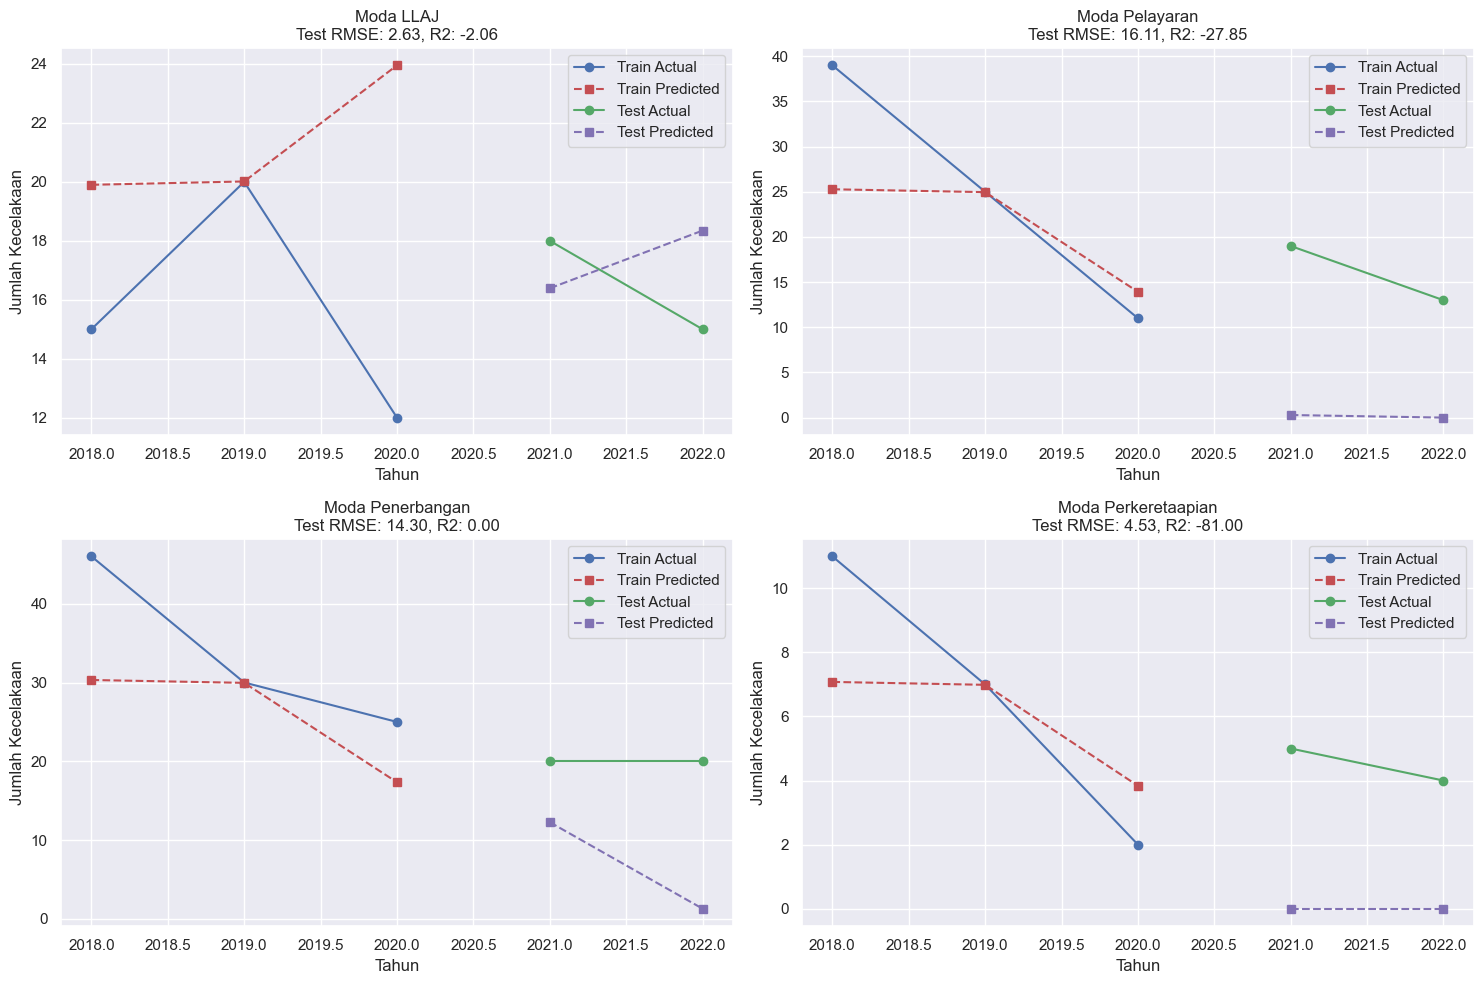


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 7.4587
Train R2: -4.1091
Train MAE: 5.6224
Test RMSE: 2.6260
Test R2: -2.0649
Test MAE: 2.4788

Moda Pelayaran:
Train RMSE: 8.0999
Train R2: 0.4979
Train MAE: 5.5627
Test RMSE: 16.1127
Test R2: -27.8464
Test MAE: 15.8573

Moda Penerbangan:
Train RMSE: 10.0732
Train R2: -0.2649
Train MAE: 7.7918
Test RMSE: 14.2969
Test R2: 0.0000
Test MAE: 13.2036

Moda Perkeretaapian:
Train RMSE: 2.4994
Train R2: 0.5391
Train MAE: 1.9227
Test RMSE: 4.5277
Test R2: -81.0000
Test MAE: 4.5000

Prediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):
Moda LLAJ: 16.39 (6.78 - 25.99)
Moda Pelayaran: 0.29 (0.00 - 14.50)
Moda Penerbangan: 12.28 (0.00 - 24.79)
Moda Perkeretaapian: -1.02 (0.00 - 3.69)


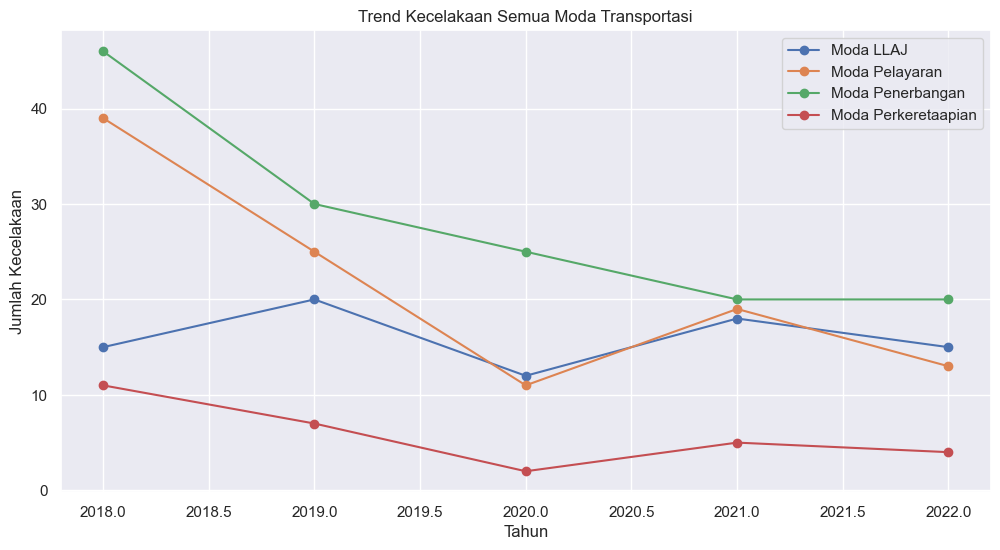

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Function untuk fit Holt's model dan evaluasi
def fit_holts(data, train_size, alpha=0.8, beta=0.2):
    train = data[:train_size]
    test = data[train_size:]
    
    # Fit model
    model = Holt(train, damped_trend=True)
    fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=0.98)
    
    # Generate predictions
    train_pred = fit.fittedvalues
    test_pred = fit.forecast(len(test))
    
    # Ensure non-negative predictions
    train_pred = np.maximum(train_pred, 0)
    test_pred = np.maximum(test_pred, 0)
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(train, train_pred)),
        'Train R2': r2_score(train, train_pred),
        'Train MAE': mean_absolute_error(train, train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(test, test_pred)),
        'Test R2': r2_score(test, test_pred),
        'Test MAE': mean_absolute_error(test, test_pred)
    }
    
    return train_pred, test_pred, metrics, fit

# 3. Train models untuk setiap moda transportasi
train_size = int(len(pivot_df) * 0.7)
models = {}
predictions = {}
metrics = {}

for column in pivot_df.columns[1:]:  # Skip 'tahun' column
    train_pred, test_pred, metric, model = fit_holts(pivot_df[column].values, train_size)
    
    predictions[column] = {
        'train': train_pred,
        'test': test_pred
    }
    metrics[column] = metric
    models[column] = model

# 4. Visualisasi
plt.figure(figsize=(15, 10))

for idx, column in enumerate(pivot_df.columns[1:]):
    plt.subplot(2, 2, idx+1)
    
    # Plot training data
    train_dates = pivot_df['tahun'][:train_size]
    test_dates = pivot_df['tahun'][train_size:]
    
    plt.plot(train_dates, pivot_df[column][:train_size], 
             'b-', label='Train Actual', marker='o')
    plt.plot(train_dates, predictions[column]['train'], 
             'r--', label='Train Predicted', marker='s')
    
    # Plot test data
    plt.plot(test_dates, pivot_df[column][train_size:], 
             'g-', label='Test Actual', marker='o')
    plt.plot(test_dates, predictions[column]['test'], 
             'm--', label='Test Predicted', marker='s')
    
    plt.title(f'{column}\nTest RMSE: {metrics[column]["Test RMSE"]:.2f}, R2: {metrics[column]["Test R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for column in pivot_df.columns[1:]:
    print(f"\n{column}:")
    for metric, value in metrics[column].items():
        print(f"{metric}: {value:.4f}")

# 6. Prediksi 2023 dengan confidence intervals
def calculate_prediction_interval(model, horizon=1, alpha=0.05):
    forecast = model.forecast(horizon)
    residuals = model.resid[~np.isnan(model.resid)]
    std_resid = np.std(residuals)
    z = 1.96  # 95% confidence interval
    
    lower = forecast - z * std_resid
    upper = forecast + z * std_resid
    
    # Ensure non-negative bounds
    lower = np.maximum(lower, 0)
    
    return forecast[0], lower[0], upper[0]

print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):")
for column in pivot_df.columns[1:]:
    pred, lower, upper = calculate_prediction_interval(models[column])
    print(f"{column}: {pred:.2f} ({lower:.2f} - {upper:.2f})")

# 7. Trend Analysis
plt.figure(figsize=(12, 6))
for column in pivot_df.columns[1:]:
    plt.plot(pivot_df['tahun'], pivot_df[column], marker='o', label=column)

plt.title('Trend Kecelakaan Semua Moda Transportasi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.grid(True)
plt.show()

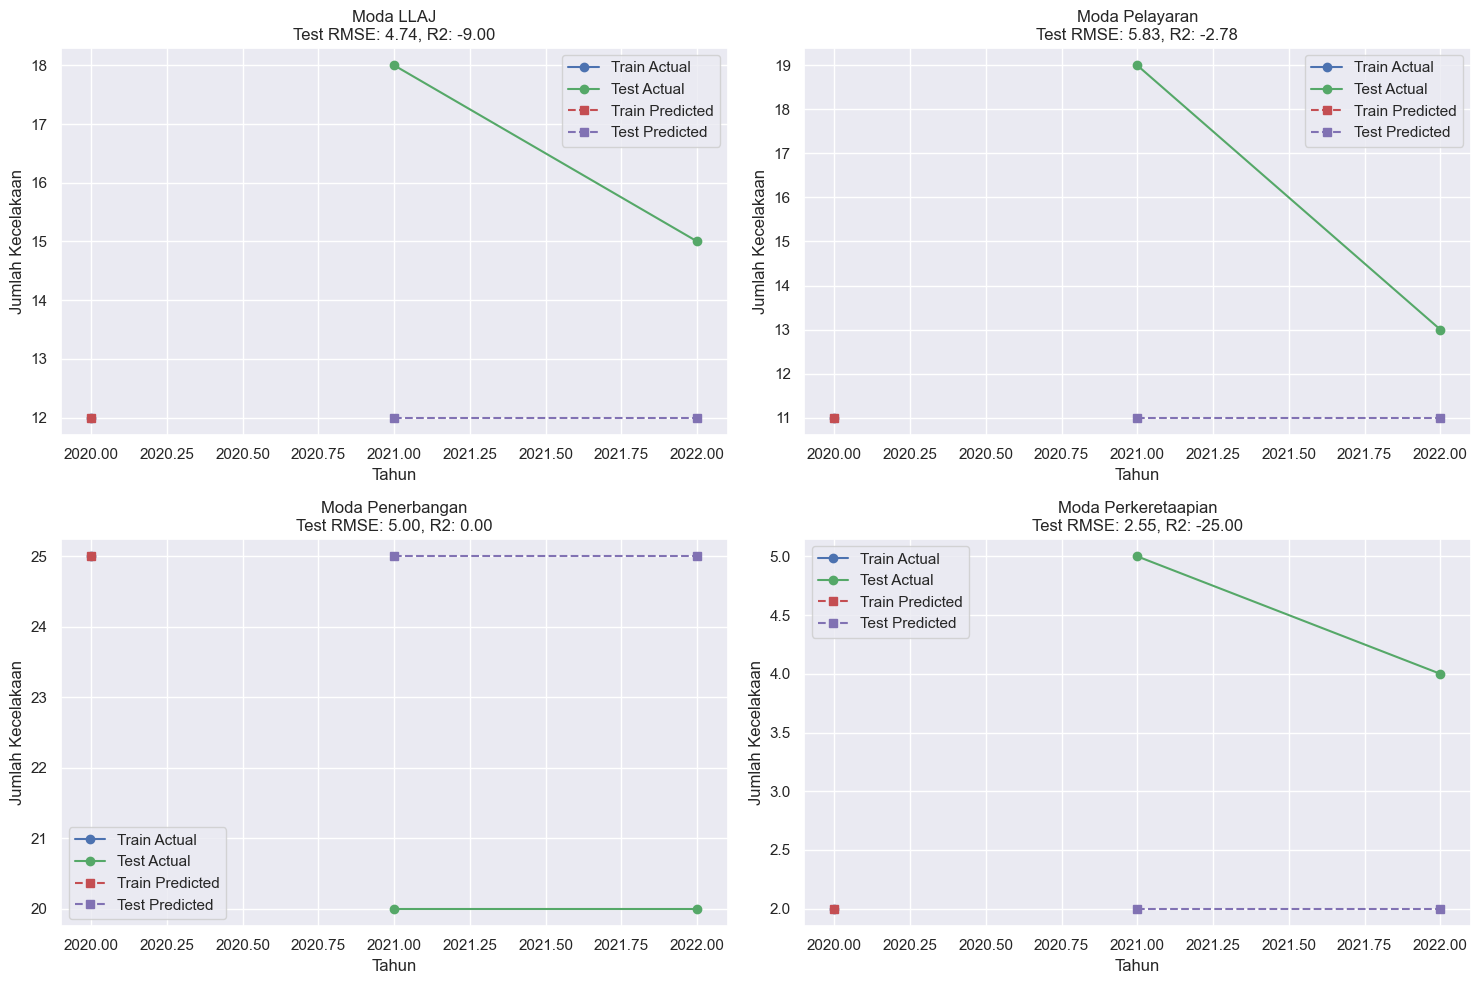


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 0.0000
Train R2: nan
Train MAE: 0.0000
Test RMSE: 4.7434
Test R2: -9.0000
Test MAE: 4.5000

Moda Pelayaran:
Train RMSE: 0.0000
Train R2: nan
Train MAE: 0.0000
Test RMSE: 5.8310
Test R2: -2.7778
Test MAE: 5.0000

Moda Penerbangan:
Train RMSE: 0.0000
Train R2: nan
Train MAE: 0.0000
Test RMSE: 5.0000
Test R2: 0.0000
Test MAE: 5.0000

Moda Perkeretaapian:
Train RMSE: 0.0000
Train R2: nan
Train MAE: 0.0000
Test RMSE: 2.5495
Test R2: -25.0000
Test MAE: 2.5000

Prediksi jumlah kecelakaan untuk tahun 2023:
Moda LLAJ: 12.00
Moda Pelayaran: 11.00
Moda Penerbangan: 25.00
Moda Perkeretaapian: 2.00


In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Feature Engineering
def create_features(df):
    df = df.copy()
    # Convert tahun to numeric features
    df['year_norm'] = (df['tahun'] - df['tahun'].min()) / (df['tahun'].max() - df['tahun'].min())
    return df

def prepare_sequence_data(data, n_prev=2):
    X, y = [], []
    for i in range(len(data)-n_prev):
        X.append(data[i:i+n_prev])
        y.append(data[i+n_prev])
    return np.array(X), np.array(y)

# 3. Model Training Function
def train_svr_model(data, train_size, n_prev=2):
    # Prepare sequence data
    X, y = prepare_sequence_data(data, n_prev)
    
    # Split data
    X_train = X[:train_size-n_prev]
    X_test = X[train_size-n_prev:]
    y_train = y[:train_size-n_prev]
    y_test = y[train_size-n_prev:]
    
    # Scale data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, n_prev))
    X_test_scaled = scaler_X.transform(X_test.reshape(-1, n_prev))
    
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
    
    # Train SVR model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')
    model.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Make predictions
    train_pred_scaled = model.predict(X_train_scaled)
    test_pred_scaled = model.predict(X_test_scaled)
    
    # Inverse transform predictions
    train_pred = scaler_y.inverse_transform(train_pred_scaled.reshape(-1, 1))
    test_pred = scaler_y.inverse_transform(test_pred_scaled.reshape(-1, 1))
    
    # Ensure non-negative predictions
    train_pred = np.maximum(train_pred, 0)
    test_pred = np.maximum(test_pred, 0)
    
    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'Train R2': r2_score(y_train, train_pred),
        'Train MAE': mean_absolute_error(y_train, train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
        'Test R2': r2_score(y_test, test_pred),
        'Test MAE': mean_absolute_error(y_test, test_pred)
    }
    
    return train_pred, test_pred, metrics, (model, scaler_X, scaler_y)

# 4. Train models
train_size = int(len(pivot_df) * 0.7)
models = {}
predictions = {}
metrics = {}

for column in pivot_df.columns[1:]:  # Skip 'tahun' column
    data = pivot_df[column].values
    train_pred, test_pred, metric, model_info = train_svr_model(data, train_size)
    
    predictions[column] = {
        'train': train_pred,
        'test': test_pred
    }
    metrics[column] = metric
    models[column] = model_info

# 5. Visualisasi
plt.figure(figsize=(15, 10))

for idx, column in enumerate(pivot_df.columns[1:]):
    plt.subplot(2, 2, idx+1)
    
    # Plot actual data
    plt.plot(pivot_df['tahun'][2:train_size], pivot_df[column][2:train_size], 
             'b-', label='Train Actual', marker='o')
    plt.plot(pivot_df['tahun'][train_size:], pivot_df[column][train_size:], 
             'g-', label='Test Actual', marker='o')
    
    # Plot predictions
    train_dates = pivot_df['tahun'][2:train_size]
    test_dates = pivot_df['tahun'][train_size:]
    
    plt.plot(train_dates, predictions[column]['train'], 
             'r--', label='Train Predicted', marker='s')
    plt.plot(test_dates, predictions[column]['test'], 
             'm--', label='Test Predicted', marker='s')
    
    plt.title(f'{column}\nTest RMSE: {metrics[column]["Test RMSE"]:.2f}, R2: {metrics[column]["Test R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Print Metrics
print("\nMetrics untuk setiap moda transportasi:")
for column in pivot_df.columns[1:]:
    print(f"\n{column}:")
    for metric, value in metrics[column].items():
        print(f"{metric}: {value:.4f}")

# 7. Prediksi 2023
def predict_next_year(model_info, last_sequence):
    model, scaler_X, scaler_y = model_info
    scaled_input = scaler_X.transform(last_sequence.reshape(1, -1))
    scaled_pred = model.predict(scaled_input)
    pred = scaler_y.inverse_transform(scaled_pred.reshape(-1, 1))
    return max(pred[0][0], 0)  # Ensure non-negative prediction

print("\nPrediksi jumlah kecelakaan untuk tahun 2023:")
for column in pivot_df.columns[1:]:
    last_sequence = pivot_df[column].values[-2:]
    pred = predict_next_year(models[column], last_sequence)
    print(f"{column}: {pred:.2f}")

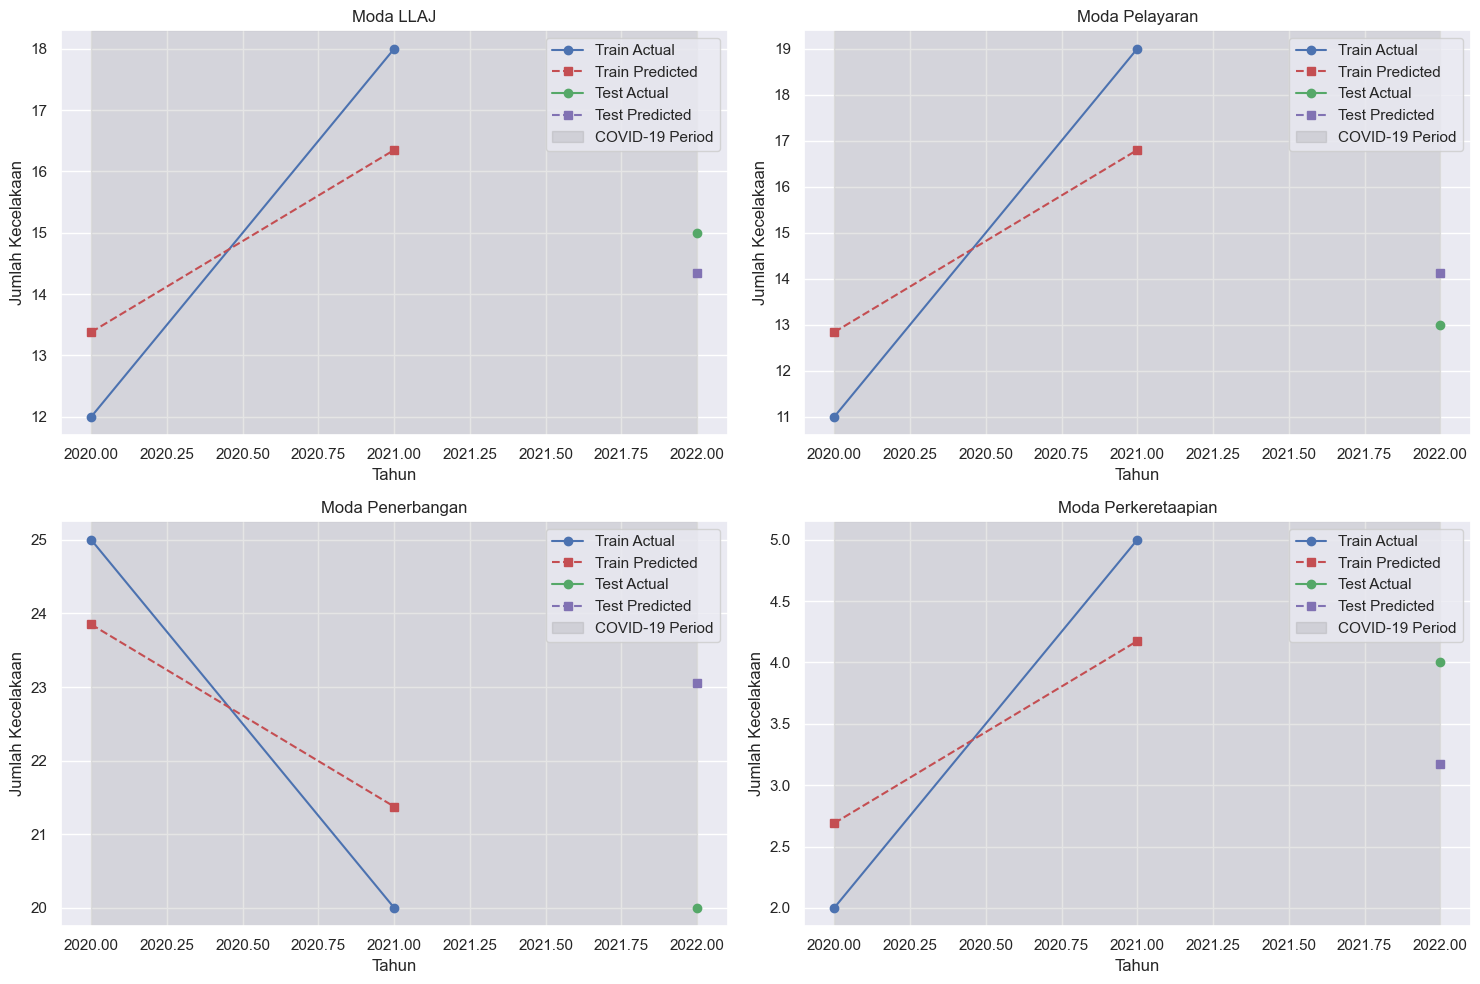


Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 1.5210
Train R2: 0.7430
Train MAE: 1.5150
Test RMSE: 0.6600
Test R2: nan
Test MAE: 0.6600

Moda Pelayaran:
Train RMSE: 2.0280
Train R2: 0.7430
Train MAE: 2.0200
Test RMSE: 1.1200
Test R2: nan
Test MAE: 1.1200

Moda Penerbangan:
Train RMSE: 1.2675
Train R2: 0.7430
Train MAE: 1.2625
Test RMSE: 3.0500
Test R2: nan
Test MAE: 3.0500

Moda Perkeretaapian:
Train RMSE: 0.7605
Train R2: 0.7429
Train MAE: 0.7575
Test RMSE: 0.8300
Test R2: nan
Test MAE: 0.8300

Top 5 Feature Importance:
                           feature  importance
6        Moda Pelayaran_pct_change    0.121212
2                   Moda LLAJ_lag2    0.111111
11        Moda Perkeretaapian_lag2    0.101010
12  Moda Perkeretaapian_pct_change    0.090909
5              Moda Pelayaran_lag2    0.080808

Prediksi jumlah kecelakaan untuk tahun 2023 (dengan asumsi dampak COVID-19 minimal):
Moda LLAJ: 14.34
Moda Pelayaran: 14.12
Moda Penerbangan: 23.05
Moda Perkeretaapian: 3.

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Menambahkan fitur COVID-19
def add_covid_feature(df):
    df = df.copy()
    
    # Tambahkan indikator COVID-19 (0 untuk pre-covid, 1 untuk masa covid, 0.5 untuk recovery)
    df['covid_impact'] = 0
    df.loc[df['tahun'] == 2020, 'covid_impact'] = 1  # Puncak pandemi
    df.loc[df['tahun'] == 2021, 'covid_impact'] = 0.7  # Masa PPKM
    df.loc[df['tahun'] == 2022, 'covid_impact'] = 0.3  # Masa recovery
    
    # Tambahkan lag features
    for col in df.columns[1:-1]:  # Skip 'tahun' dan 'covid_impact'
        df[f'{col}_lag1'] = df[col].shift(1)
        df[f'{col}_lag2'] = df[col].shift(2)
        
        # Perubahan persentase YoY
        df[f'{col}_pct_change'] = df[col].pct_change() * 100
        
    return df

# 3. Prepare Data
pivot_df = add_covid_feature(pivot_df)
pivot_df = pivot_df.dropna()

# Split features dan target
features = ['covid_impact'] + [col for col in pivot_df.columns if ('lag' in col or 'pct_change' in col)]
targets = ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']

X = pivot_df[features]
y = pivot_df[targets]

# 4. Train Test Split
train_size = int(len(X) * 0.7)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# 5. Model Training
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train model dengan RandomForest
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=4,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train_scaled, y_train_scaled)

# 6. Predictions
train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled))
test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled))

# 7. Visualisasi
plt.figure(figsize=(15, 10))

for idx, target in enumerate(targets):
    plt.subplot(2, 2, idx+1)
    
    # Plot training data
    plt.plot(pivot_df['tahun'][:train_size], y_train[target], 
             'b-', label='Train Actual', marker='o')
    plt.plot(pivot_df['tahun'][:train_size], train_pred[:, idx], 
             'r--', label='Train Predicted', marker='s')
    
    # Plot test data
    plt.plot(pivot_df['tahun'][train_size:], y_test[target], 
             'g-', label='Test Actual', marker='o')
    plt.plot(pivot_df['tahun'][train_size:], test_pred[:, idx], 
             'm--', label='Test Predicted', marker='s')
    
    # Highlight COVID-19 period
    plt.axvspan(2020, 2022, color='gray', alpha=0.2, label='COVID-19 Period')
    
    plt.title(f'{target}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 8. Calculate Metrics
metrics = {}
for idx, target in enumerate(targets):
    metrics[target] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train[target], train_pred[:, idx])),
        'Train R2': r2_score(y_train[target], train_pred[:, idx]),
        'Train MAE': mean_absolute_error(y_train[target], train_pred[:, idx]),
        'Test RMSE': np.sqrt(mean_squared_error(y_test[target], test_pred[:, idx])),
        'Test R2': r2_score(y_test[target], test_pred[:, idx]),
        'Test MAE': mean_absolute_error(y_test[target], test_pred[:, idx])
    }

print("\nMetrics untuk setiap moda transportasi:")
for target in metrics:
    print(f"\n{target}:")
    for metric, value in metrics[target].items():
        print(f"{metric}: {value:.4f}")

# 9. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Feature Importance:")
print(feature_importance.head())

# 10. Prediksi 2023
# Asumsi COVID-19 impact menurun ke 0.1 di 2023
last_data = X.iloc[-1:].copy()
last_data['covid_impact'] = 0.1

last_data_scaled = scaler_X.transform(last_data)
future_pred = scaler_y.inverse_transform(model.predict(last_data_scaled))[0]

print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan asumsi dampak COVID-19 minimal):")
for idx, target in enumerate(targets):
    print(f"{target}: {future_pred[idx]:.2f}")

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Feature Engineering (Simplified)
def add_features(df):
    df = df.copy()
    
    # COVID-19 Impact dengan weight
    df['covid_impact'] = 0
    df.loc[df['tahun'] == 2020, 'covid_impact'] = 1.0  # Full impact
    df.loc[df['tahun'] == 2021, 'covid_impact'] = 0.6  # Partial recovery
    df.loc[df['tahun'] == 2022, 'covid_impact'] = 0.2  # Minimal impact
    
    # Trend feature
    df['year_norm'] = (df['tahun'] - df['tahun'].min()) / (df['tahun'].max() - df['tahun'].min())
    
    # Simplified lag features
    for col in df.columns[1:-2]:
        df[f'{col}_lag1'] = df[col].shift(1)
    
    return df

# 3. Apply smoothing
def apply_smoothing(series, window=3):
    if len(series) < window:
        return series
    return savgol_filter(series, window, 1)

# 4. Prepare Data
pivot_df = add_features(pivot_df)
pivot_df = pivot_df.dropna()

# Apply smoothing to target variables
for col in ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']:
    pivot_df[col] = apply_smoothing(pivot_df[col].values)

# Features dan targets
features = [col for col in pivot_df.columns if col not in ['tahun'] + 
           ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']]
targets = ['Moda LLAJ', 'Moda Pelayaran', 'Moda Penerbangan', 'Moda Perkeretaapian']

# 5. Feature Selection
def select_features(X, y, k=5):
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    return selector

# 6. Model Training with modified train-test split
train_size = int(len(pivot_df) * 0.7)
X = pivot_df[features]
y = pivot_df[targets]

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# 7. Model Training with Gradient Boosting
scaler_X = RobustScaler()  # More robust to outliers
scalers_y = {target: RobustScaler() for target in targets}

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

models = {}
predictions = {}
metrics = {}
selected_features = {}

for target in targets:
    # Feature Selection
    selector = select_features(X_train_scaled, y_train[target])
    selected_features[target] = [features[i] for i in range(len(features)) if selector.get_support()[i]]
    
    # Scale target
    y_train_scaled = scalers_y[target].fit_transform(y_train[target].values.reshape(-1, 1))
    y_test_scaled = scalers_y[target].transform(y_test[target].values.reshape(-1, 1))
    
    # Train Gradient Boosting model with careful tuning
    model = GradientBoostingRegressor(
        n_estimators=50,  # Reduced from typical 100
        learning_rate=0.05,  # Smaller learning rate
        max_depth=2,  # Reduced complexity
        min_samples_split=3,
        subsample=0.8,  # Prevent overfitting
        random_state=42
    )
    
    # Use selected features only
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)
    
    model.fit(X_train_selected, y_train_scaled.ravel())
    models[target] = (model, selector)
    
    # Make predictions
    train_pred = model.predict(X_train_selected).reshape(-1, 1)
    test_pred = model.predict(X_test_selected).reshape(-1, 1)
    
    # Inverse transform predictions
    train_pred = scalers_y[target].inverse_transform(train_pred)
    test_pred = scalers_y[target].inverse_transform(test_pred)
    
    predictions[target] = {
        'train': train_pred.ravel(),
        'test': test_pred.ravel()
    }
    
    # Calculate metrics
    metrics[target] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train[target], train_pred)),
        'Train R2': r2_score(y_train[target], train_pred),
        'Train MAE': mean_absolute_error(y_train[target], train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test[target], test_pred)),
        'Test R2': r2_score(y_test[target], test_pred),
        'Test MAE': mean_absolute_error(y_test[target], test_pred)
    }

# 8. Improved confidence intervals calculation
def calculate_prediction_intervals(model, selector, X_scaled, scaler_y, n_iterations=1000):
    predictions = []
    X_selected = selector.transform(X_scaled)
    
    # Bootstrap prediction
    for _ in range(n_iterations):
        # Add noise to input
        noise = np.random.normal(0, 0.1, X_selected.shape)
        noisy_X = X_selected + noise
        pred = model.predict(noisy_X).reshape(-1, 1)
        predictions.append(pred)
    
    predictions = np.array(predictions)
    lower = np.percentile(predictions, 2.5, axis=0)
    upper = np.percentile(predictions, 97.5, axis=0)
    mean = np.mean(predictions, axis=0)
    
    # Inverse transform
    lower = scaler_y.inverse_transform(lower.reshape(-1, 1))
    upper = scaler_y.inverse_transform(upper.reshape(-1, 1))
    mean = scaler_y.inverse_transform(mean.reshape(-1, 1))
    
    return mean[0], lower[0], upper[0]

# 9. Predict 2023
last_data = X.iloc[[-1]].copy()
last_data['covid_impact'] = 0.1  # Minimal COVID impact for 2023
last_data_scaled = scaler_X.transform(last_data)

print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):")
for target in targets:
    model, selector = models[target]
    mean, lower, upper = calculate_prediction_intervals(
        model, selector, last_data_scaled, scalers_y[target])
    print(f"{target}: {mean[0]:.2f} ({lower[0]:.2f} - {upper[0]:.2f})")

# 10. Print Metrics and Feature Importance
print("\nMetrics untuk setiap moda transportasi:")
for target in targets:
    print(f"\n{target}:")
    for metric, value in metrics[target].items():
        print(f"{metric}: {value:.4f}")
    
    print("\nSelected Features:")
    print(selected_features[target])


Prediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):
Moda LLAJ: 17.18 (17.18 - 17.18)
Moda Pelayaran: 19.88 (19.88 - 19.88)
Moda Penerbangan: 27.57 (27.57 - 27.57)
Moda Perkeretaapian: 5.18 (5.18 - 5.18)

Metrics untuk setiap moda transportasi:

Moda LLAJ:
Train RMSE: 0.5002
Train R2: -0.0009
Train MAE: 0.5000
Test RMSE: 1.6160
Test R2: -3.6424
Test MAE: 1.4314

Selected Features:
['year_norm', 'Moda LLAJ_lag1', 'Moda Pelayaran_lag1', 'Moda Penerbangan_lag1', 'Moda Perkeretaapian_lag1']

Moda Pelayaran:
Train RMSE: 1.5006
Train R2: -0.0009
Train MAE: 1.5000
Test RMSE: 5.0689
Test R2: -101.7743
Test MAE: 5.0442

Selected Features:
['year_norm', 'Moda LLAJ_lag1', 'Moda Pelayaran_lag1', 'Moda Penerbangan_lag1', 'Moda Perkeretaapian_lag1']

Moda Penerbangan:
Train RMSE: 2.5011
Train R2: -0.0009
Train MAE: 2.5000
Test RMSE: 7.2653
Test R2: -32.7819
Test MAE: 7.1569

Selected Features:
['year_norm', 'Moda LLAJ_lag1', 'Moda Pelayaran_lag1', 'Moda Penerbangan_lag1', 

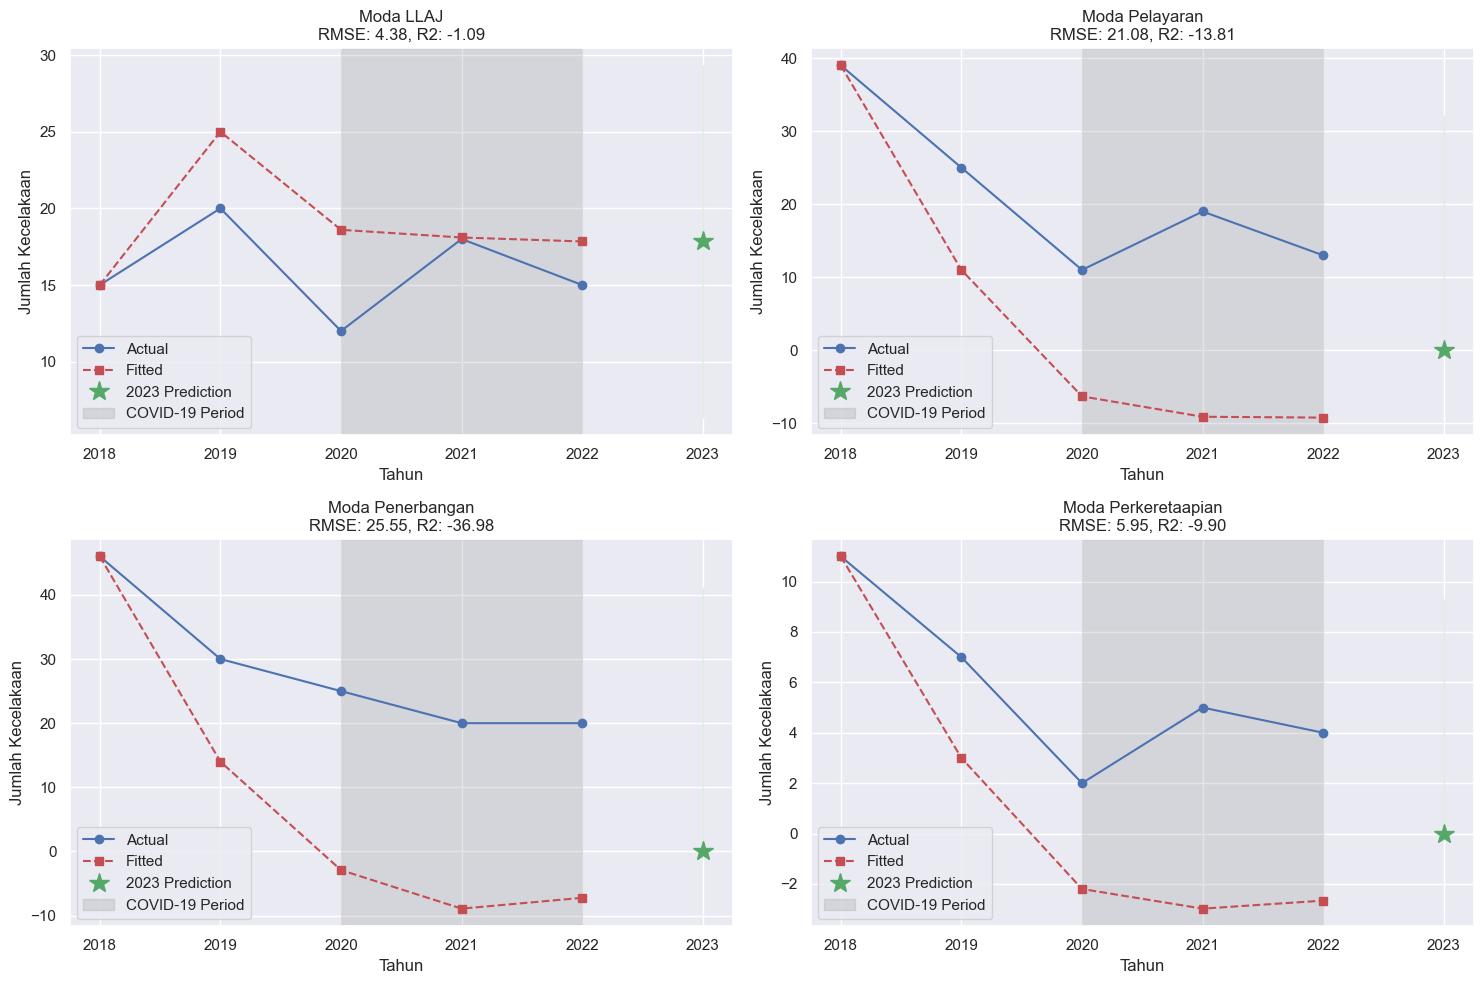


Prediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):

Moda LLAJ:
Prediksi: 17.84
Interval: (6.35 - 29.33)
Best Parameters: alpha=0.5, beta=0.2
Metrics: RMSE=4.3771, R2=-1.0853

Moda Pelayaran:
Prediksi: 0.00
Interval: (0.00 - 32.18)
Best Parameters: alpha=0.5, beta=0.2
Metrics: RMSE=21.0799, R2=-13.8120

Moda Penerbangan:
Prediksi: 0.00
Interval: (0.00 - 41.18)
Best Parameters: alpha=0.5, beta=0.2
Metrics: RMSE=25.5507, R2=-36.9832

Moda Perkeretaapian:
Prediksi: 0.00
Interval: (0.00 - 9.32)
Best Parameters: alpha=0.5, beta=0.2
Metrics: RMSE=5.9519, R2=-9.9002


In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Simple Exponential Smoothing dengan Trend Adjustment
def predict_with_trend(data, alpha=0.3, beta=0.1, covid_weights=None):
    # Jika ada covid weights, terapkan weighted averaging
    if covid_weights is not None:
        weighted_data = data * covid_weights
    else:
        weighted_data = data
    
    # Level dan trend initialization
    level = weighted_data[0]
    trend = weighted_data[1] - weighted_data[0]
    predictions = [level]
    levels = [level]
    trends = [trend]
    
    # Update level dan trend
    for t in range(1, len(weighted_data)):
        last_level = level
        level = alpha * weighted_data[t] + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        predictions.append(level + trend)
        levels.append(level)
        trends.append(trend)
    
    # Prediksi berikutnya
    next_pred = level + trend
    
    # Calculate prediction interval
    rmse = np.sqrt(mean_squared_error(data[1:], predictions[1:]))
    ci_factor = 1.96  # 95% confidence interval
    
    # Adjust prediction intervals berdasarkan historical volatility
    volatility = np.std(data - predictions) * np.sqrt(len(data))
    lower = next_pred - ci_factor * volatility
    upper = next_pred + ci_factor * volatility
    
    # Ensure non-negative predictions
    lower = max(0, lower)
    next_pred = max(0, next_pred)
    
    return next_pred, lower, upper, predictions, levels, trends

# 3. Define COVID weights
def get_covid_weights(years):
    weights = np.ones(len(years))
    weights[years == 2020] = 0.5  # Reduced weight for peak COVID year
    weights[years == 2021] = 0.7  # Partial recovery
    weights[years == 2022] = 0.9  # Near normal
    return weights

# 4. Apply model untuk setiap moda transportasi
results = {}
metrics = {}

for column in pivot_df.columns[1:]:  # Skip tahun column
    data = pivot_df[column].values
    years = pivot_df['tahun'].values
    covid_weights = get_covid_weights(years)
    
    # Find optimal parameters using grid search
    best_rmse = float('inf')
    best_params = None
    
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
        for beta in [0.05, 0.1, 0.15, 0.2]:
            next_pred, lower, upper, predictions, levels, trends = predict_with_trend(
                data, alpha, beta, covid_weights)
            rmse = np.sqrt(mean_squared_error(data[1:], predictions[1:]))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (alpha, beta)
    
    # Use best parameters
    next_pred, lower, upper, predictions, levels, trends = predict_with_trend(
        data, best_params[0], best_params[1], covid_weights)
    
    results[column] = {
        'prediction': next_pred,
        'lower': lower,
        'upper': upper,
        'historical_predictions': predictions,
        'levels': levels,
        'trends': trends,
        'best_params': best_params
    }
    
    # Calculate metrics
    metrics[column] = {
        'RMSE': np.sqrt(mean_squared_error(data[1:], predictions[1:])),
        'MAE': mean_absolute_error(data[1:], predictions[1:]),
        'R2': r2_score(data[1:], predictions[1:])
    }

# 5. Visualisasi
plt.figure(figsize=(15, 10))

for idx, column in enumerate(pivot_df.columns[1:]):
    plt.subplot(2, 2, idx+1)
    
    # Plot actual data
    plt.plot(pivot_df['tahun'], pivot_df[column], 
             'b-', label='Actual', marker='o')
    
    # Plot predictions
    predictions = results[column]['historical_predictions']
    plt.plot(pivot_df['tahun'], predictions, 
             'r--', label='Fitted', marker='s')
    
    # Plot 2023 prediction with confidence interval
    next_year = pivot_df['tahun'].max() + 1
    plt.plot(next_year, results[column]['prediction'], 
             'g*', label='2023 Prediction', markersize=15)
    
    plt.fill_between([next_year], 
                    [results[column]['lower']], 
                    [results[column]['upper']], 
                    color='g', alpha=0.2)
    
    # Highlight COVID period
    plt.axvspan(2020, 2022, color='gray', alpha=0.2, label='COVID-19 Period')
    
    plt.title(f'{column}\nRMSE: {metrics[column]["RMSE"]:.2f}, R2: {metrics[column]["R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Print Results
print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):")
for column in pivot_df.columns[1:]:
    print(f"\n{column}:")
    print(f"Prediksi: {results[column]['prediction']:.2f}")
    print(f"Interval: ({results[column]['lower']:.2f} - {results[column]['upper']:.2f})")
    print(f"Best Parameters: alpha={results[column]['best_params'][0]}, beta={results[column]['best_params'][1]}")
    print(f"Metrics: RMSE={metrics[column]['RMSE']:.4f}, R2={metrics[column]['R2']:.4f}")

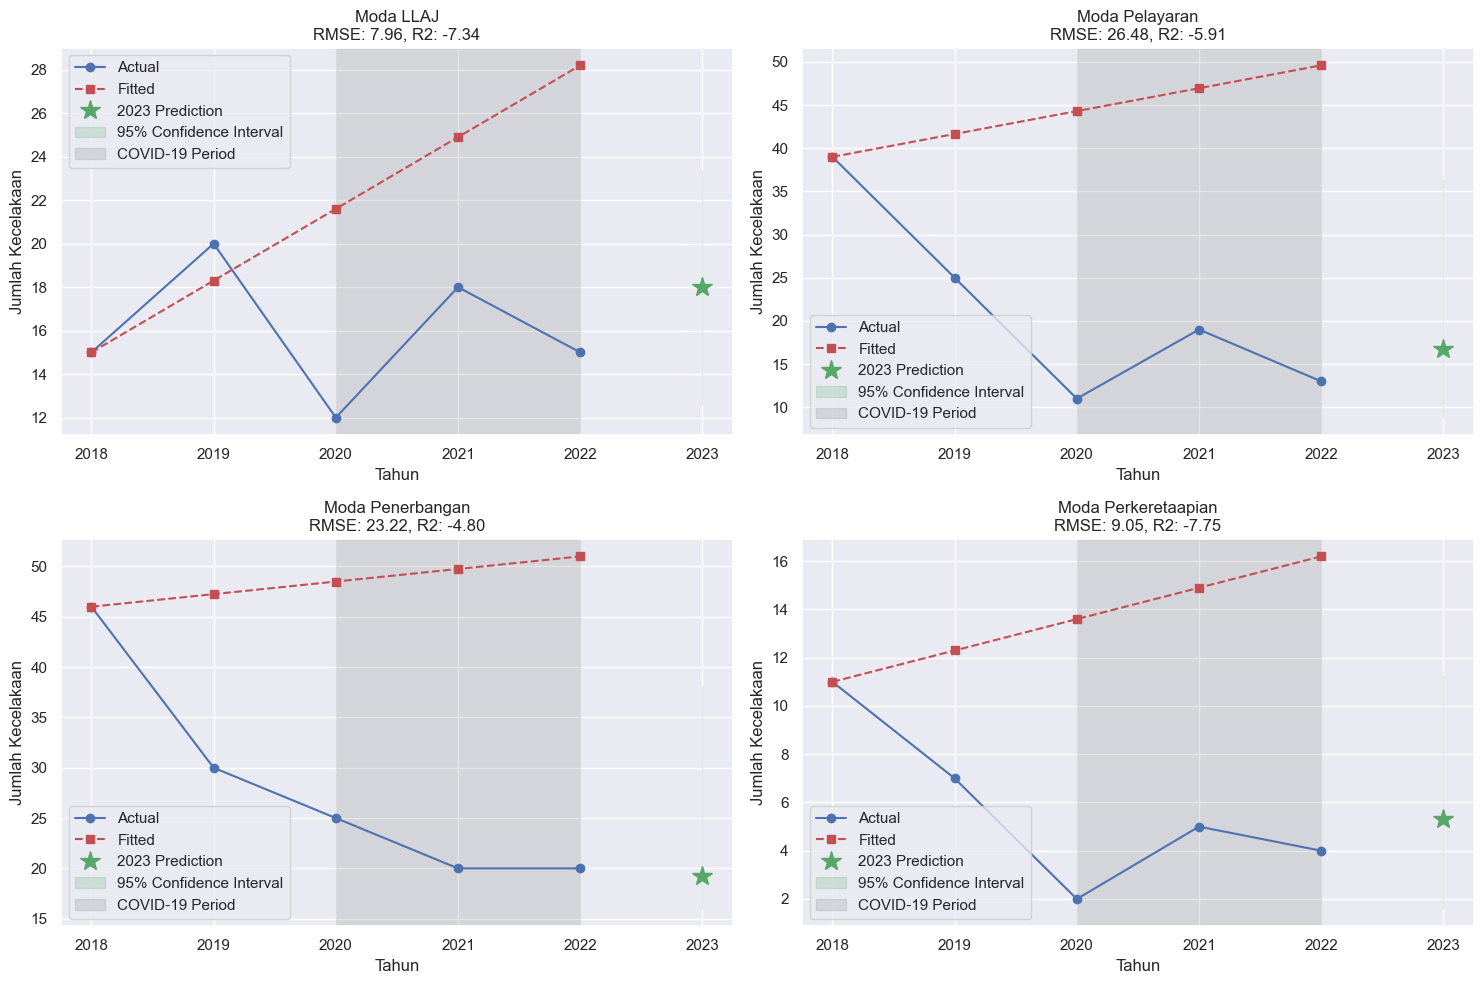


Prediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):

Moda LLAJ:
Prediksi: 18.00
Interval: (12.60 - 23.40)
Best Parameters: alpha=0.1, beta=0.05
Metrics: RMSE=7.9612, R2=-7.3395

Moda Pelayaran:
Prediksi: 16.75
Interval: (8.80 - 36.49)
Best Parameters: alpha=0.1, beta=0.05
Metrics: RMSE=26.4835, R2=-5.9142

Moda Penerbangan:
Prediksi: 19.25
Interval: (16.00 - 38.15)
Best Parameters: alpha=0.1, beta=0.05
Metrics: RMSE=23.2201, R2=-4.8001

Moda Perkeretaapian:
Prediksi: 5.30
Interval: (1.60 - 11.30)
Best Parameters: alpha=0.1, beta=0.05
Metrics: RMSE=9.0499, R2=-7.7500

Analisis Trend:

Moda LLAJ:
Perubahan dari 2022: 20.0%

Moda Pelayaran:
Perubahan dari 2022: 28.8%

Moda Penerbangan:
Perubahan dari 2022: -3.8%

Moda Perkeretaapian:
Perubahan dari 2022: 32.5%


In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Data Preprocessing
df = pd.read_csv('clean_data_knkt.csv')
df_accidents = df[df['uraian'] == 'Kecelakaan'].copy()
pivot_df = df_accidents.pivot(index='tahun', columns='kategori', values='nilai').reset_index()
pivot_df.columns.name = None

# 2. Define minimum thresholds berdasarkan historical data
def get_min_threshold(data):
    return max(np.min(data) * 0.8, 1)  # 80% dari minimum historical atau 1

# 3. Modified Exponential Smoothing dengan adaptive parameters
def predict_with_trend_modified(data, alpha=0.2, beta=0.05, covid_weights=None):
    if covid_weights is not None:
        weighted_data = data * covid_weights
    else:
        weighted_data = data
    
    # Base level dari weighted average 2 tahun terakhir
    level = weighted_data[-2:].mean()
    
    # Trend dari rata-rata perubahan
    trends = np.diff(weighted_data)
    trend = np.mean(trends[-2:])  # rata-rata 2 perubahan terakhir
    
    # Historical variance untuk confidence intervals
    variance = np.var(data)
    std_dev = np.sqrt(variance)
    
    # Prediksi
    next_pred = level + trend
    
    # Minimal prediction berdasarkan historical data
    min_threshold = get_min_threshold(data)
    next_pred = max(next_pred, min_threshold)
    
    # Confidence intervals
    ci_factor = 1.96  # 95% confidence interval
    lower = max(next_pred - ci_factor * std_dev, min_threshold)
    upper = next_pred + ci_factor * std_dev
    
    # Calculate historical fits
    predictions = []
    for t in range(len(data)):
        if t == 0:
            predictions.append(data[0])
        else:
            pred = predictions[-1] + trend
            pred = max(pred, min_threshold)
            predictions.append(pred)
    
    return next_pred, lower, upper, predictions

# 4. Modified COVID weights
def get_modified_weights(years):
    weights = np.ones(len(years))
    weights[years == 2020] = 0.7  # Less extreme reduction
    weights[years == 2021] = 0.8  # Less extreme reduction
    weights[years == 2022] = 1.0  # Back to normal
    return weights

# 5. Apply model untuk setiap moda transportasi
results = {}
metrics = {}

for column in pivot_df.columns[1:]:  # Skip tahun column
    data = pivot_df[column].values
    years = pivot_df['tahun'].values
    covid_weights = get_modified_weights(years)
    
    # Grid search dengan parameter yang lebih conservative
    best_rmse = float('inf')
    best_params = None
    best_predictions = None
    best_next = None
    best_lower = None
    best_upper = None
    
    for alpha in [0.1, 0.15, 0.2, 0.25]:
        for beta in [0.05, 0.1, 0.15]:
            next_pred, lower, upper, predictions = predict_with_trend_modified(
                data, alpha, beta, covid_weights)
            rmse = np.sqrt(mean_squared_error(data, predictions))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (alpha, beta)
                best_predictions = predictions
                best_next = next_pred
                best_lower = lower
                best_upper = upper
    
    results[column] = {
        'prediction': best_next,
        'lower': best_lower,
        'upper': best_upper,
        'historical_predictions': best_predictions,
        'best_params': best_params
    }
    
    # Calculate metrics
    metrics[column] = {
        'RMSE': np.sqrt(mean_squared_error(data, best_predictions)),
        'MAE': mean_absolute_error(data, best_predictions),
        'R2': r2_score(data, best_predictions)
    }

# 6. Visualisasi
plt.figure(figsize=(15, 10))

for idx, column in enumerate(pivot_df.columns[1:]):
    plt.subplot(2, 2, idx+1)
    
    # Plot actual data
    plt.plot(pivot_df['tahun'], pivot_df[column], 
             'b-', label='Actual', marker='o')
    
    # Plot predictions
    predictions = results[column]['historical_predictions']
    plt.plot(pivot_df['tahun'], predictions, 
             'r--', label='Fitted', marker='s')
    
    # Plot 2023 prediction with confidence interval
    next_year = pivot_df['tahun'].max() + 1
    plt.plot(next_year, results[column]['prediction'], 
             'g*', label='2023 Prediction', markersize=15)
    
    # Plot confidence interval
    plt.fill_between([next_year], 
                    [results[column]['lower']], 
                    [results[column]['upper']], 
                    color='g', alpha=0.2,
                    label='95% Confidence Interval')
    
    # Highlight COVID period
    plt.axvspan(2020, 2022, color='gray', alpha=0.2, label='COVID-19 Period')
    
    plt.title(f'{column}\nRMSE: {metrics[column]["RMSE"]:.2f}, R2: {metrics[column]["R2"]:.2f}')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecelakaan')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Print Results
print("\nPrediksi jumlah kecelakaan untuk tahun 2023 (dengan interval kepercayaan 95%):")
for column in pivot_df.columns[1:]:
    print(f"\n{column}:")
    print(f"Prediksi: {results[column]['prediction']:.2f}")
    print(f"Interval: ({results[column]['lower']:.2f} - {results[column]['upper']:.2f})")
    print(f"Best Parameters: alpha={results[column]['best_params'][0]}, beta={results[column]['best_params'][1]}")
    print(f"Metrics: RMSE={metrics[column]['RMSE']:.4f}, R2={metrics[column]['R2']:.4f}")

# 8. Analisis Trend
print("\nAnalisis Trend:")
for column in pivot_df.columns[1:]:
    current = pivot_df[column].iloc[-1]
    predicted = results[column]['prediction']
    change = ((predicted - current) / current) * 100
    print(f"\n{column}:")
    print(f"Perubahan dari 2022: {change:.1f}%")